In [2]:
import scimap as sm
import pandas as pd
import sys
import os
import scanpy as sc
import seaborn as sns; sns.set(color_codes=True)
import anndata
adata = anndata.read_h5ad("/data/vasileiosionat2/IBEX_FINAL/Scimap/Adata/adata_ROIs.h5ad")
adata.obs

SampleID Region   X_centroid   Y_centroid    Area  MajorAxisLength  \
0        HV196B    Epi  4063.439560   117.074176   364.0        22.370634   
1        HV196B    Epi  3906.382114   121.085366   246.0        20.441847   
2        HV196B    Epi  4046.433333   119.300000   150.0        16.610911   
3        HV196B    Epi  3925.083102   125.171745   722.0        36.032598   
4        HV196B    Epi  3950.053150   129.606299   508.0        27.802349   
...         ...    ...          ...          ...     ...              ...   
370783  HV195A1    Epi  3129.127196  3308.111736  1423.0        51.882097   
370784  HV195A1    Epi  2959.323333  3307.864444   900.0        37.111385   
370785  HV195A1    Epi  2994.039424  3311.975739  1319.0        50.436389   
370786  HV195A1    Epi  3047.255569  3311.067995  1706.0        64.079403   
370787  HV195A1    Epi  3090.664683  3312.356151  1008.0        40.127727   

        MinorAxisLength  Eccentricity  Solidity    Extent  ...  \
0             21.038466      0.339932  0.943005  0.659420  ...   
1             17.120427      0.546409  0.907749  0.615000  ...   
2             12.183316      0.679741  0.887574  0.721154  ...   
3             26.241478      0.685290  0.918575  0.705767  ...   
4             25.184052      0.423653  0.862479  0.627160  ...   
...                 ...           ...       ...       ...  ...   
370783        36.168967      0.716937  0.918065  0.748947  ...   
370784        31.354542      0.534961  0.955414  0.802139  ...   
370785        35.218756      0.715824  0.913435  0.769096  ...   
370786        35.168771      0.835933  0.948305  0.880289  ...   
370787        34.078582      0.527987  0.889673  0.745011  ...   

        spatial_kmeans_knn5_k12  spatial_kmeans_knn5_k14  \
0                             4                       12   
1                             4                       12   
2                             4                       12   
3                             4                       12   
4                             4                       12   
...                         ...                      ...   
370783                        1                        8   
370784                        3                        2   
370785                        3                        2   
370786                        3                        2   
370787                        3                        2   

       spatial_kmeans_knn30_k8 spatial_kmeans_knn30_k10  \
0                            6                        1   
1                            6                        1   
2                            6                        1   
3                            6                        1   
4                            6                        9   
...                        ...                      ...   
370783                       1                        1   
370784                       1                        1   
370785                       1                        1   
370786                       1                        1   
370787                       1                        1   

       spatial_kmeans_knn30_k12 spatial_kmeans_knn30_k11  \
0                             2                        1   
1                             2                        1   
2                             2                        1   
3                             2                        6   
4                             2                        6   
...                         ...                      ...   
370783                       11                        1   
370784                       11                        1   
370785                       11                        1   
370786                       11                        1   
370787                       11                        1   

       spatial_kmeans_knn100_k8 spatial_kmeans_knn100_k10  \
0                             7                         8   
1               

In [5]:
import scanpy as sc

# Define the replacement dictionary
replacement_dict = {
    'keratin epithelial cell': 'Keratin Epi',
    'Langerhans cell': 'Langerhans',
    'fibroblast': 'Fibroblast',
    'spinous epithelial cell': 'Spinous Epi',
    'intraepithelial neutrophil': 'Intraepithelial neutrophil',
    'proliferating epithelial cell': 'Proliferating Epi',
    'basal / parabasal epithelial cell': 'Basal-Parabasal Epi',
    'other': 'Other',
    'neutrophil': 'Neutrophil',
    'APC-myeloid': 'APC-myeloid',
    'crevicular epithelial cell': 'Crevicular Epi',
    'mast cell': 'Mast',
    'CD8 T cell': 'T cytotoxic',
    'plasma cell': 'Plasma',
    'T cell / APC mix': 'T-APC mix',
    'endothelial cell': 'Endothelial',
    'intraepithelial T cell': 'Intraepithelial T',
    'SMC': 'SMC',
    'CD4 T cell': 'T helper',
    'b cell': 'B',
}

# Replace values in the 'lvl3_spatial_cluster' column
adata.obs['lvl3_spatial_cluster'] = adata.obs['lvl3_spatial_cluster'].replace(replacement_dict)

# Print unique values after replacement
print(adata.obs['lvl3_spatial_cluster'].unique())


['Keratin Epi', 'Langerhans', 'Fibroblast', 'Spinous Epi', 'Intraepithelial neutrophil', ..., 'Intraepithelial T', 'SMC', 'T helper', 'B', 'Myofibroblast']
Length: 21
Categories (21, object): ['APC-myeloid', 'T helper', 'T cytotoxic', 'Langerhans', ..., 'Other', 'Plasma', 'Proliferating Epi', 'Spinous Epi']


In [6]:
unique_values = adata.obs['niche'].unique().tolist()
print(unique_values)

['crevicular epithelial', 'spinous epithelial', 'fibroblast', 'basal / parabasal epithelial', 'blood vessel', 'neutrophil (CT)', 'plasma cell', 'T cell / APC']


In [7]:
import scanpy as sc

# Define the replacement dictionary
replacement_dict2 = {
    'crevicular epithelial': 'Crevicular',
    'spinous epithelial': 'Spinous',
    'fibroblast': 'Fibroblast',
    'basal / parabasal epithelial': 'Basal-Parabasal',
    'blood vessel': 'BV',
    'neutrophil (CT)': 'Neutrophil(CT)',
    'plasma cell': 'Plasma',
    'T cell / APC': 'T-APC'
}

# Replace values in the 'niche' column
adata.obs['niche'] = adata.obs['niche'].replace(replacement_dict2)

# Print unique values after replacement
print(adata.obs['niche'].unique())

['Crevicular', 'Spinous', 'Fibroblast', 'Basal-Parabasal', 'BV', 'Neutrophil(CT)', 'Plasma', 'T-APC']
Categories (8, object): ['T-APC', 'Basal-Parabasal', 'BV', 'Crevicular', 'Fibroblast', 'Neutrophil(CT)', 'Plasma', 'Spinous']


In [8]:
unique_values = adata.obs['spatial_cluster'].unique().tolist()
print(unique_values)

['keratin epithelial cell', 'intraepithelial APC', 'Thy-1(-) fibroblast', 'spinous epithelial cell', 'intraepithelial neutrophil', 'fibroblast', 'proliferating epithelial cell', 'basal/parabasal epithelial cell', 'Extracellular matrix / Vim(+)', 'S100a8/9(-) neutrophil', 'APC (proximity to blood vessel)', 'crevicular epithelial cell', 'APC', 'mast cell', 'CD8 T cell', 'plasma cell', 'T cell (proximity to APC)', 'aSMA(-) endothelial cell', 'APC (proximity to T cell)', 'endothelial / immune mix', 'HLA-DR(+) endothelial cell', 'intravascular neutrophil', 'Thy-1(+) / CD45(+) cell', 'intraepithelial T cell', 'HLA-DR(+) fibroblast', 'endothelial cell', 'HLA-DR(+) SMC', 'S100a8/9(+) neutrophil, CT', 'CD8 T cell / b cell mix', 'SMC', 'plasma / T cell mix', 'Unknown', 'Unknown2', 'CD4 T cell', 'plasma cell / proximity to T cell', 'CD4 T cell / b cell mix', 'b cell', 'myofibroblast']


In [9]:
import scanpy as sc

# Define the replacement dictionary
replacement_dict = {
    'keratin epithelial cell': 'Keratin Epi',
    'intraepithelial APC': 'Langerhans',
    'Thy-1(-) fibroblast': 'Thy1(-) Fibroblast',
    'spinous epithelial cell': 'Spinous Epithelial',
    'intraepithelial neutrophil': 'Intraepithelial Neutrophil',
    'fibroblast': 'Thy1(+) Fibroblast',
    'proliferating epithelial cell': 'Proliferating Epi',
    'basal/parabasal epithelial cell': 'Basal-Parabasal Epi',
    'Extracellular matrix / Vim(+)': 'ECM-Vim(+)',
    'S100a8/9(-) neutrophil': 'S100a8-9(-) Neutrophil',
    'APC (proximity to blood vessel)': 'APC-myeloid (proximity to BV)',
    'crevicular epithelial cell': 'Crevicular Epi',
    'APC': 'APC-myeloid',
    'mast cell': 'Mast',
    'CD8 T cell': 'T cytotoxic',
    'plasma cell': 'Plasma',
    'T cell (proximity to APC)': 'T (proximity to APC)',
    'aSMA(-) endothelial cell': 'aSMA(-) Endothelial',
    'APC (proximity to T cell)': 'APC (proximity to T)',
    'endothelial / immune mix': 'Endothelial-Immune mix',
    'HLA-DR(+) endothelial cell': 'HLA-DR(+) Endothelial',
    'intravascular neutrophil': 'Neutrophil (BV-associated)',
    'Thy-1(+) / CD45(+) cell': 'Thy1-CD45(+) cell',
    'intraepithelial T cell': 'Intraepithelial T',
    'HLA-DR(+) fibroblast': 'HLA-DR(+) Fibroblast',
    'endothelial cell': 'Endothelial',
    'HLA-DR(+) SMC': 'HLA-DR(+) SMC',
    'S100a8/9(+) neutrophil, CT': 'S100a-9(+) Neutrophil-CT',
    'CD8 T cell / b cell mix': 'CD20-CD8(+)mix',
    'SMC': 'SMC',
    'plasma / T cell mix': 'Plasma-T mix',
    'Unknown': 'Unclear',
    'Unknown2': 'Unclear',
    'CD4 T cell': 'Thelper',
    'plasma cell / proximity to T cell': 'Plasma (proximity to T)',
    'CD4 T cell / b cell mix': 'Thelper-B mix',
    'b cell': 'B',
}

# Replace values in the 'spatial_cluster' column
adata.obs['spatial_cluster'] = adata.obs['spatial_cluster'].replace(replacement_dict)

# Print unique values after replacement
print(adata.obs['spatial_cluster'].unique())


['Keratin Epi', 'Langerhans', 'Thy1(-) Fibroblast', 'Spinous Epithelial', 'Intraepithelial Neutrophil', ..., 'Thelper', 'Plasma (proximity to T)', 'Thelper-B mix', 'B', 'Myofibroblast']
Length: 37
Categories (37, object): ['APC-myeloid', 'APC (proximity to T)', 'APC-myeloid (proximity to BV)', 'Thelper', ..., 'Spinous Epithelial', 'Keratin Epi', 'Myofibroblast', 'T (proximity to APC)']


In [10]:
unique_values = adata.obs['lvl1_spatial_cluster'].unique().tolist()
print(unique_values)

['Epithelial', 'Immune', 'Fibroblast', 'Other', 'Vascular']


In [11]:
adata.obs

SampleID Region   X_centroid   Y_centroid    Area  MajorAxisLength  \
0        HV196B    Epi  4063.439560   117.074176   364.0        22.370634   
1        HV196B    Epi  3906.382114   121.085366   246.0        20.441847   
2        HV196B    Epi  4046.433333   119.300000   150.0        16.610911   
3        HV196B    Epi  3925.083102   125.171745   722.0        36.032598   
4        HV196B    Epi  3950.053150   129.606299   508.0        27.802349   
...         ...    ...          ...          ...     ...              ...   
370783  HV195A1    Epi  3129.127196  3308.111736  1423.0        51.882097   
370784  HV195A1    Epi  2959.323333  3307.864444   900.0        37.111385   
370785  HV195A1    Epi  2994.039424  3311.975739  1319.0        50.436389   
370786  HV195A1    Epi  3047.255569  3311.067995  1706.0        64.079403   
370787  HV195A1    Epi  3090.664683  3312.356151  1008.0        40.127727   

        MinorAxisLength  Eccentricity  Solidity    Extent  ...     CT  \
0             21.038466      0.339932  0.943005  0.659420  ...  Other   
1             17.120427      0.546409  0.907749  0.615000  ...  Other   
2             12.183316      0.679741  0.887574  0.721154  ...  Other   
3             26.241478      0.685290  0.918575  0.705767  ...  Other   
4             25.184052      0.423653  0.862479  0.627160  ...  Other   
...                 ...           ...       ...       ...  ...    ...   
370783        36.168967      0.716937  0.918065  0.748947  ...  Other   
370784        31.354542      0.534961  0.955414  0.802139  ...  Other   
370785        35.218756      0.715824  0.913435  0.769096  ...  Other   
370786        35.168771      0.835933  0.948305  0.880289  ...  Other   
370787        34.078582      0.527987  0.889673  0.745011  ...  Other   

                           kmeans_new lvl3_spatial_cluster  \
0             keratin epithelial cell          Keratin Epi   
1             keratin epithelial cell          Keratin Epi   
2             keratin epithelial cell          Keratin Epi   
3             keratin epithelial cell          Keratin Epi   
4             keratin epithelial cell          Keratin Epi   
...                               ...                  ...   
370783  proliferating epithelial cell    Proliferating Epi   
370784  proliferating epithelial cell    Proliferating Epi   
370785  proliferating epithelial cell    Proliferating Epi   
370786  proliferating epithelial cell    Proliferating Epi   
370787  proliferating epithelial cell    Proliferating Epi   

       lvl2_spatial_cluster lvl1_spatial_cluster Region_Area  \
0                Epi (oral)           Epithelial  675919.403   
1                Epi (oral)           Epithelial  675919.403   
2                Epi (oral)           Epithelial  675919.403   
3                Epi (oral)           Epithelial  675919.403   
4                Epi (oral)           Epithelial  675919.403   
...                     ...                  ...         ...   
370783           Epi (oral)           Epithelial  438618.240   
370784           Epi (oral)           Epithelial  438618.240   
370785           Epi (oral)           Epithelial  438618.240   
370786           Epi (oral)           Epithelial  438618.240   
370787           Epi (oral)           Epithelial  438618.240   

       spatial_count_knn spatial_kmeans_knn       niche spatial_kmeans_radius  
0                      6                  6  Crevicular                     1  
1                      6                  6  Crevicular                     1  
2                      6                  6  Crevicular                     1  
3                      6                  6  Crevicular                     1  
4                      6                  6  Crevicular                     1  
...                  ...                ...         ...                   ...  
370783                 6                  1     Spinous                     5  
370784                 6                  1     Spi

In [5]:
adata.write_h5ad("/data/vasileiosionat2/IBEX_FINAL/Scimap/Adata/adata_ROIs.h5ad")

In [14]:
unique_values = adata.obs['niche'].unique().tolist()
print(unique_values)

['Crevicular', 'Spinous', 'Fibroblast', 'Basal-Parabasal', 'BV', 'Neutrophil(CT)', 'Plasma', 'T-APC']


In [4]:
import scanpy as sc

# Define the replacement dictionary
replacement_dict = {
    'Keratin Epi': 'Keratin',
    'Spinous Epi': 'Spinous',
    'Intraepithelial neutrophil': 'Neutrophil',
    'Proliferating Epi':'Proliferating',
    'Basal-Parabasal Epi': 'Basal-Parabasal',
    'Crevicular Epi': 'Crevicular',
    'Intraepithelial T': 'T (IE)',
}

# Replace values in the 'lvl3_spatial_cluster' column
adata.obs['lvl3_spatial_cluster'] = adata.obs['lvl3_spatial_cluster'].replace(replacement_dict)

# Print unique values after replacement
print(adata.obs['lvl3_spatial_cluster'].unique())


['Keratin', 'Langerhans', 'Fibroblast', 'Spinous', 'Neutrophil', ..., 'T (IE)', 'SMC', 'T helper', 'B', 'Myofibroblast']
Length: 20
Categories (20, object): ['APC-myeloid', 'T helper', 'T cytotoxic', 'Langerhans', ..., 'Other', 'Plasma', 'Proliferating', 'Spinous']


In [3]:
unique_values = adata.obs['spatial_cluster'].unique().tolist()
print(unique_values)

['Keratin Epi', 'Langerhans', 'Thy1(-) Fibroblast', 'Spinous Epithelial', 'Intraepithelial Neutrophil', 'Thy1(+) Fibroblast', 'Proliferating Epi', 'Basal-Parabasal Epi', 'ECM-Vim(+)', 'S100a8-9(-) Neutrophil', 'APC-myeloid (proximity to BV)', 'Crevicular Epi', 'APC-myeloid', 'Mast', 'T cytotoxic', 'Plasma', 'T (proximity to APC)', 'aSMA(-) Endothelial', 'APC (proximity to T)', 'Endothelial-Immune mix', 'HLA-DR(+) Endothelial', 'Neutrophil (BV-associated)', 'Thy1-CD45(+) cell', 'Intraepithelial T', 'HLA-DR(+) Fibroblast', 'Endothelial', 'HLA-DR(+) SMC', 'S100a-9(+) Neutrophil-CT', 'CD20-CD8(+)mix', 'SMC', 'Plasma-T mix', 'Unclear', 'Thelper', 'Plasma (proximity to T)', 'Thelper-B mix', 'B', 'Myofibroblast']


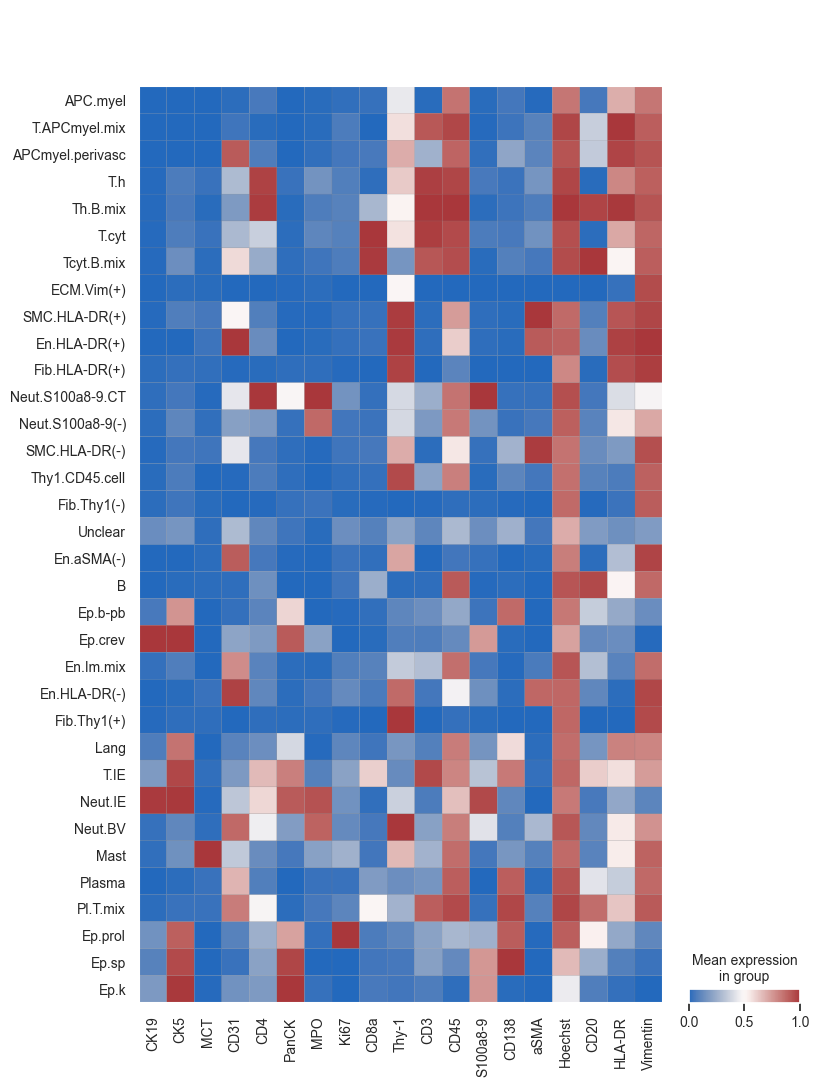

In [8]:
sc.pl.matrixplot(adata, var_names= adata.var.index, groupby='spatial_cluster', dendrogram=False, use_raw=False, cmap="vlag", standard_scale='var')

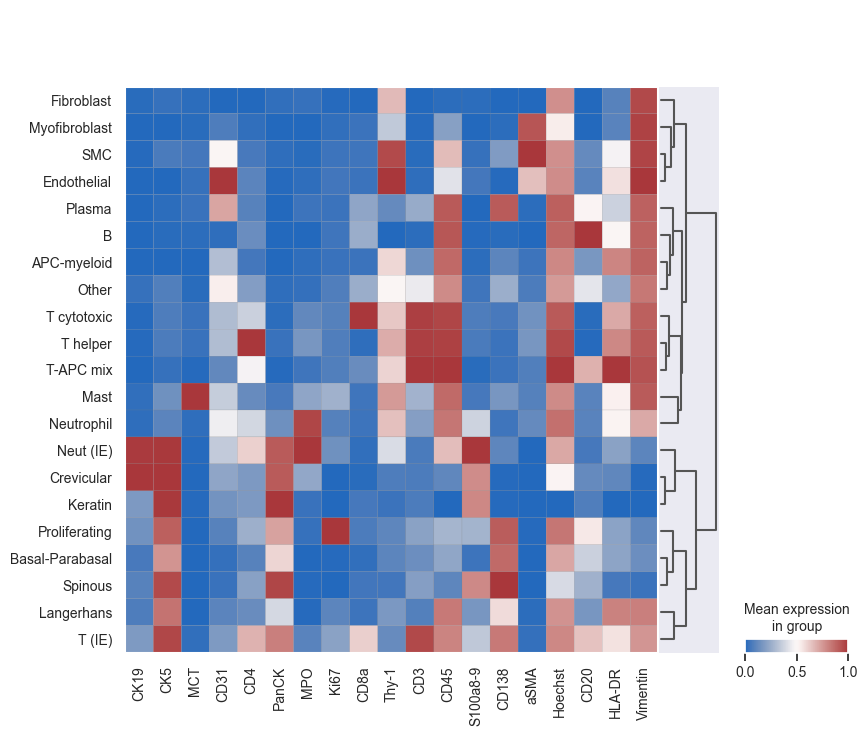

In [6]:
sc.pl.matrixplot(adata, var_names= adata.var.index, groupby='lvl3_spatial_cluster', dendrogram=True, use_raw=False, cmap="vlag", standard_scale='var')

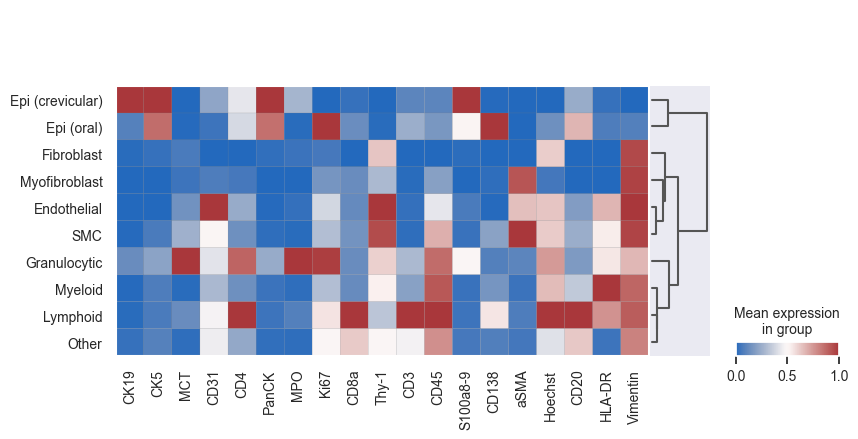

In [7]:
sc.pl.matrixplot(adata, var_names= adata.var.index, groupby='lvl2_spatial_cluster', dendrogram=True, use_raw=False, cmap="vlag", standard_scale='var')

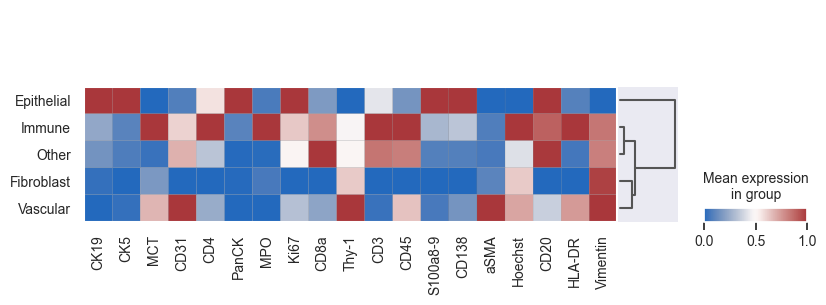

In [8]:
sc.pl.matrixplot(adata, var_names= adata.var.index, groupby='lvl1_spatial_cluster', dendrogram=True, use_raw=False, cmap="vlag", standard_scale='var')

In [26]:
import scanpy as sc

# Define the replacement dictionary
replacement_dict = {
    'Myofibroblast': 'SMC',
}

# Replace values in the 'lvl3_spatial_cluster' column
adata.obs['spatial_cluster'] = adata.obs['spatial_cluster'].replace(replacement_dict)
# Replace values in the 'lvl3_spatial_cluster' column
adata.obs['lvl3_spatial_cluster'] = adata.obs['lvl3_spatial_cluster'].replace(replacement_dict)
# Replace values in the 'lvl3_spatial_cluster' column
adata.obs['lvl2_spatial_cluster'] = adata.obs['lvl2_spatial_cluster'].replace(replacement_dict)
# Print unique values after replacement
print(adata.obs['lvl2_spatial_cluster'].unique())


['Epi (oral)', 'Myeloid', 'Fibroblast', 'Granulocytic', 'Other', 'Epi (crevicular)', 'Lymphoid', 'Endothelial', 'SMC']
Categories (9, object): ['Endothelial', 'Epi (crevicular)', 'Epi (oral)', 'Fibroblast', ..., 'Lymphoid', 'Myeloid', 'Other', 'SMC']


In [27]:
adata.obs['lvl1_spatial_cluster'].value_counts()

Immune        197139
Epithelial     85474
Other          40812
Vascular       29364
Fibroblast     17999
Name: lvl1_spatial_cluster, dtype: int64

In [28]:
Vasc_lvl1 = ['SMC']
adata.obs.loc[adata.obs['lvl2_spatial_cluster'].isin(Vasc_lvl1), 'lvl1_spatial_cluster'] = 'Vascular'

In [29]:
adata.obs['lvl1_spatial_cluster'].value_counts()

Immune        197139
Epithelial     85474
Other          40812
Vascular       31112
Fibroblast     16251
Name: lvl1_spatial_cluster, dtype: int64

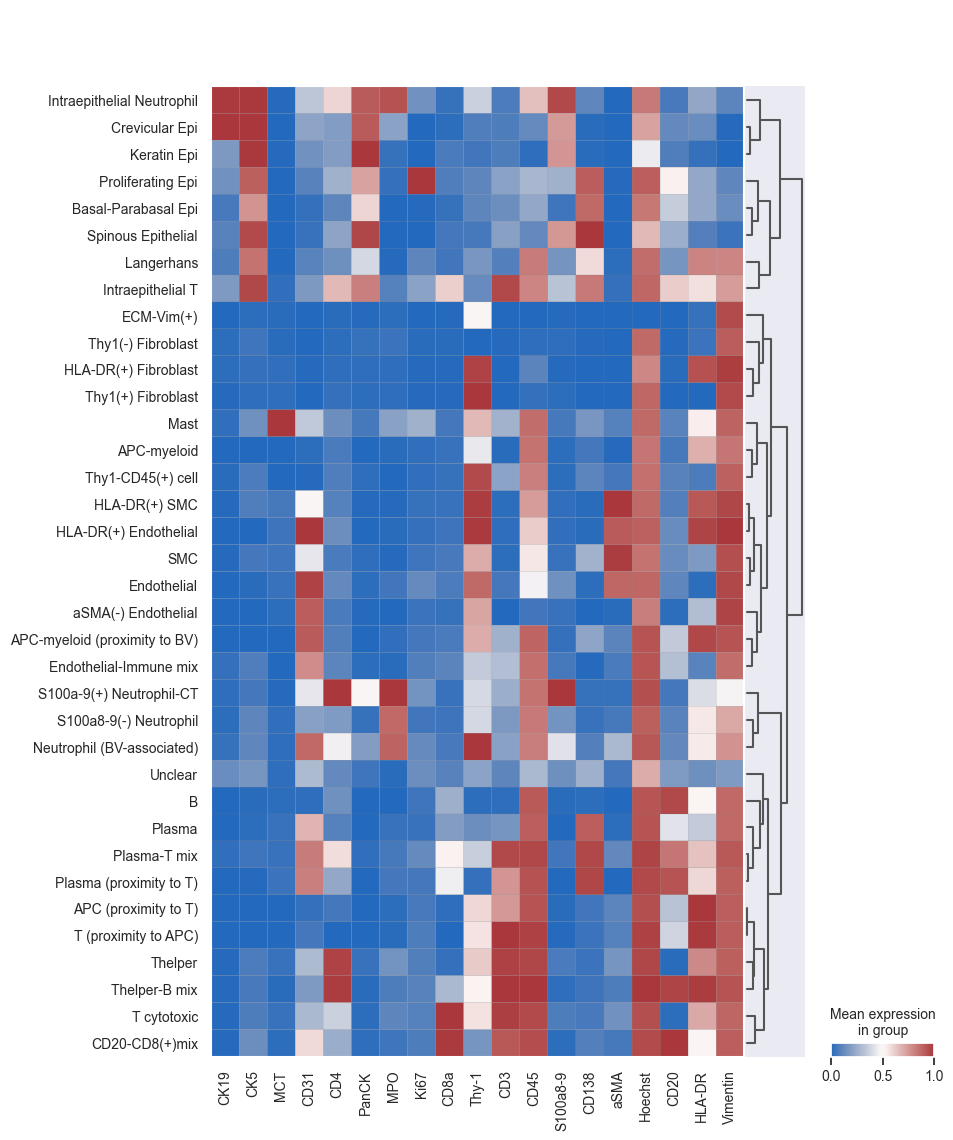

In [30]:
sc.pl.matrixplot(adata, var_names= adata.var.index, groupby='spatial_cluster', dendrogram=True, use_raw=False, cmap="vlag", standard_scale='var')

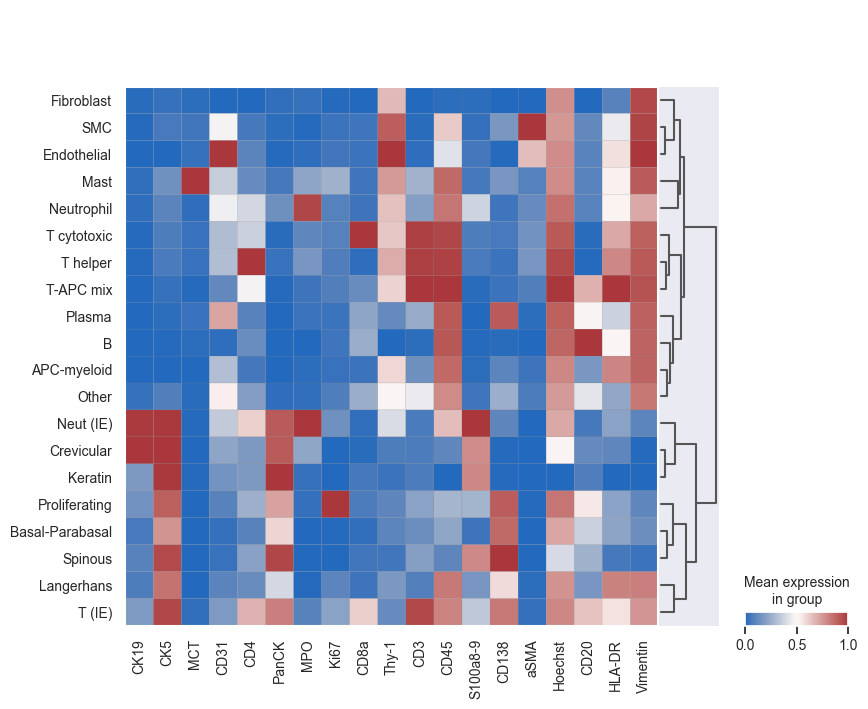

In [16]:
sc.pl.matrixplot(adata, var_names= adata.var.index, groupby='lvl3_spatial_cluster', dendrogram=True, use_raw=False, cmap="vlag", standard_scale='var')

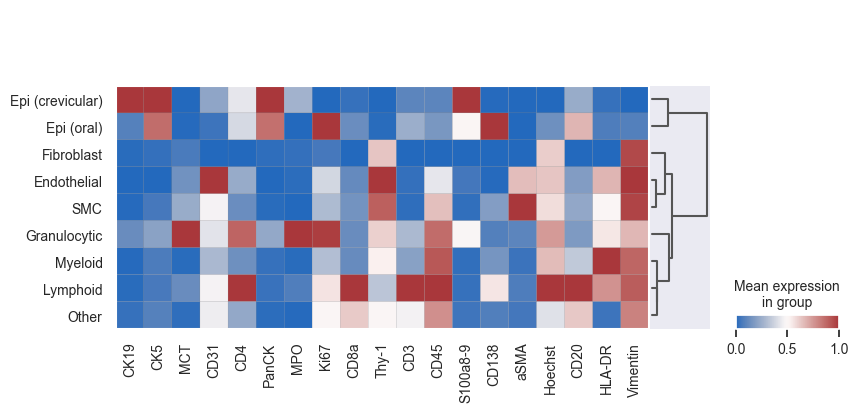

In [17]:
sc.pl.matrixplot(adata, var_names= adata.var.index, groupby='lvl2_spatial_cluster', dendrogram=True, use_raw=False, cmap="vlag", standard_scale='var')

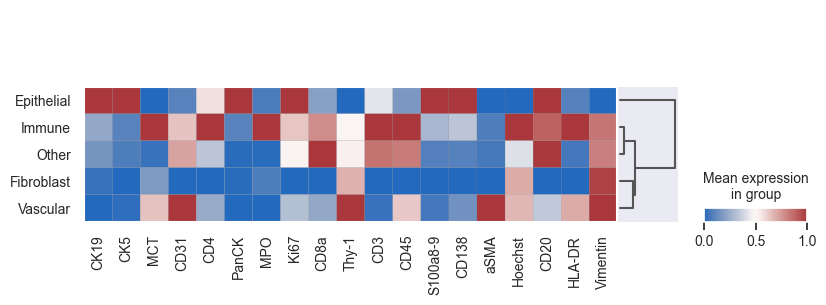

In [18]:
sc.pl.matrixplot(adata, var_names= adata.var.index, groupby='lvl1_spatial_cluster', dendrogram=True, use_raw=False, cmap="vlag", standard_scale='var')

In [8]:
import pandas as pd

# Assuming adata.obs contains 'lvl2_spatial_cluster' and 'lvl3_spatial_clusters'
cluster_counts = (
    adata.obs.groupby(['lvl3_spatial_cluster', 'spatial_cluster']).size().unstack(fill_value=0)
)

# Adjust Pandas display settings to show all columns
pd.set_option('display.max_columns', None)

# Display the full result
print(cluster_counts)

# Reset the option if needed (optional)
pd.reset_option('display.max_columns')


spatial_cluster       APC-myeloid  APC (proximity to T)  \
lvl3_spatial_cluster                                      
APC-myeloid                 34624                  4191   
T helper                        0                     0   
T cytotoxic                     0                     0   
Langerhans                      0                     0   
SMC                             0                     0   
T-APC mix                       0                     0   
B                               0                     0   
Basal-Parabasal                 0                     0   
Crevicular                      0                     0   
Endothelial                     0                     0   
Fibroblast                      0                     0   
T (IE)                          0                     0   
Keratin                         0                     0   
Mast                            0                     0   
Myofibroblast                   0                     0 

In [13]:
import pandas as pd

# Filter the data for the 'Thelper-b mix' category in the 'spatial_cluster' column
thelper_b_mix_counts = adata.obs[adata.obs['spatial_cluster'] == 'Plasma-T mix']

# Group by 'SampleID' and count the occurrences
thelper_b_mix_counts_by_sample = thelper_b_mix_counts.groupby('SampleID').size()

# Convert to DataFrame for better readability (optional)
thelper_b_mix_counts_by_sample = thelper_b_mix_counts_by_sample.reset_index(name='Thelper-b mix Count')

# Display the result
print(thelper_b_mix_counts_by_sample)

       SampleID  Thelper-b mix Count
0       HV137B1                 1003
1       HV137B2                   15
2       HV140A1                   20
3       HV140A2                   49
4        HV140B                 1906
5       HV154B1                  164
6       HV154B2                  456
7        HV160D                    1
8        HV171B                   48
9       HV180B1                   82
10      HV180B2                    0
11       HV189B                    2
12       HV190B                   29
13       HV191B                    9
14      HV195A1                   38
15      HV195A2                   21
16       HV196B                   69
17       HV203B                    4
18       HV204B                 2516
19       HV207B                  193
20       HV214A                  103
21  HV214A1surg                   57
22  HV214A2surg                  129
23      HV219B1                  781
24      HV219B2                  647
25      HV219B3                  724
2

In [31]:
# Define the replacement dictionary
replacement_dict = {
    'CD20-CD8(+)mix': 'Tcytotoxic-B mix',
}

# Replace values in the 'spatial_cluster' column
adata.obs['spatial_cluster'] = adata.obs['spatial_cluster'].replace(replacement_dict)

In [44]:
import scanpy as sc
sc.tl.dendrogram(adata, groupby='spatial_cluster')


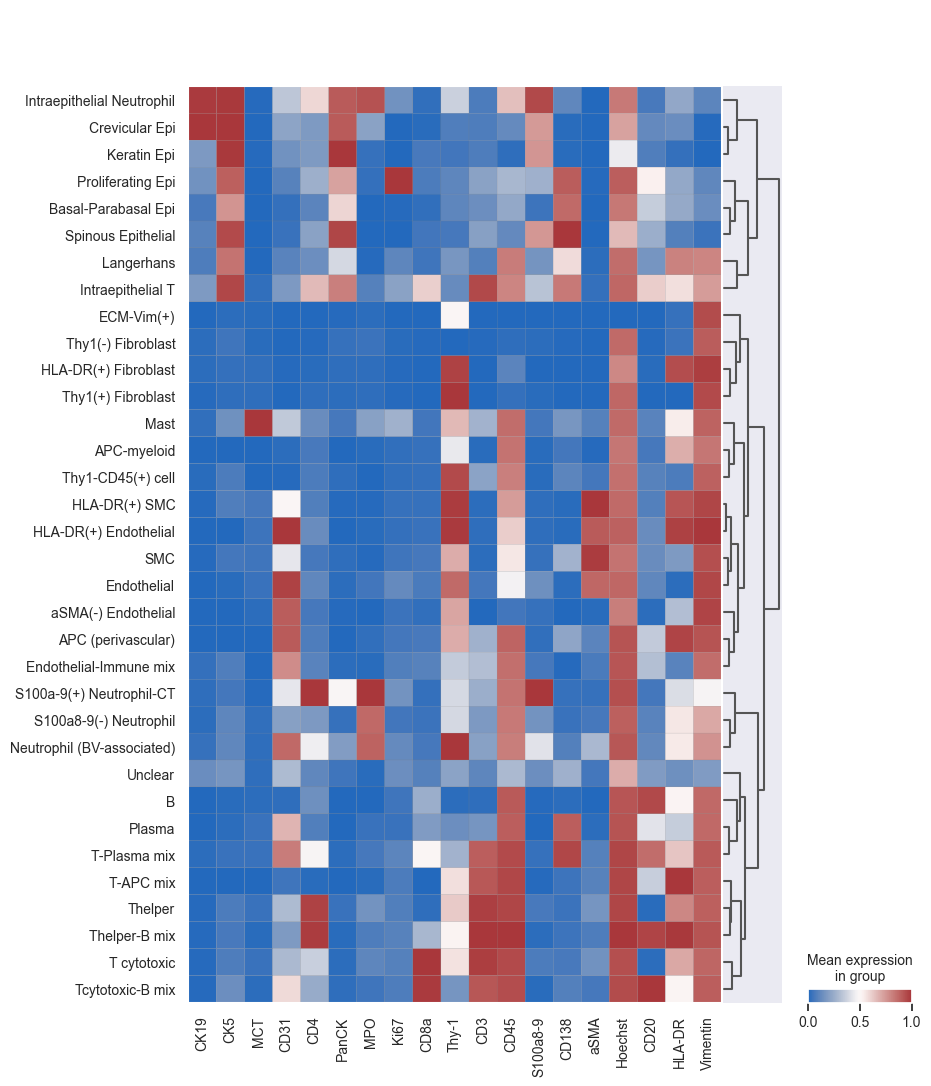

In [45]:
sc.pl.matrixplot(adata, var_names=adata.var.index, groupby='spatial_cluster', dendrogram=True, use_raw=False, cmap="vlag", standard_scale='var')

In [37]:
# Define the replacement dictionary
replacement_dict = {
    'Plasma (proximity to T)': 'T-Plasma mix',
    'Plasma-T mix': 'T-Plasma mix'
}

# Replace values in the 'spatial_cluster' column
adata.obs['spatial_cluster'] = adata.obs['spatial_cluster'].replace(replacement_dict)

In [40]:
# Define the replacement dictionary
replacement_dict = {
    'APC (proximity to T)': 'T-APC mix',
    'T (proximity to APC)': 'T-APC mix'
}

# Replace values in the 'spatial_cluster' column
adata.obs['spatial_cluster'] = adata.obs['spatial_cluster'].replace(replacement_dict)

In [43]:
# Define the replacement dictionary
replacement_dict = {
    'APC-myeloid (proximity to BV)': 'APC (perivascular)',
  }

# Replace values in the 'spatial_cluster' column
adata.obs['spatial_cluster'] = adata.obs['spatial_cluster'].replace(replacement_dict)

In [47]:
# Add the new category to the list of allowed categories
adata.obs['lvl3_spatial_cluster'] = adata.obs['lvl3_spatial_cluster'].cat.add_categories(['T-Plasma mix'])

# Assign the new category to the desired cells
TP_lvl3 = ['T-Plasma mix']
adata.obs.loc[adata.obs['spatial_cluster'].isin(TP_lvl3), 'lvl3_spatial_cluster'] = 'T-Plasma mix'


In [48]:
# Add the new category to the list of allowed categories
adata.obs['lvl3_spatial_cluster'] = adata.obs['lvl3_spatial_cluster'].cat.add_categories(['T-B mix'])

# Assign the new category to the desired cells
TP_lvl3 = ['Thelper-B mix','Tcytotoxic-B mix']
adata.obs.loc[adata.obs['spatial_cluster'].isin(TP_lvl3), 'lvl3_spatial_cluster'] = 'T-B mix'


In [49]:
# Assign the new category to the desired cells
TP_lvl3 = ['T-APC mix']
adata.obs.loc[adata.obs['spatial_cluster'].isin(TP_lvl3), 'lvl3_spatial_cluster'] = 'T-APC mix'

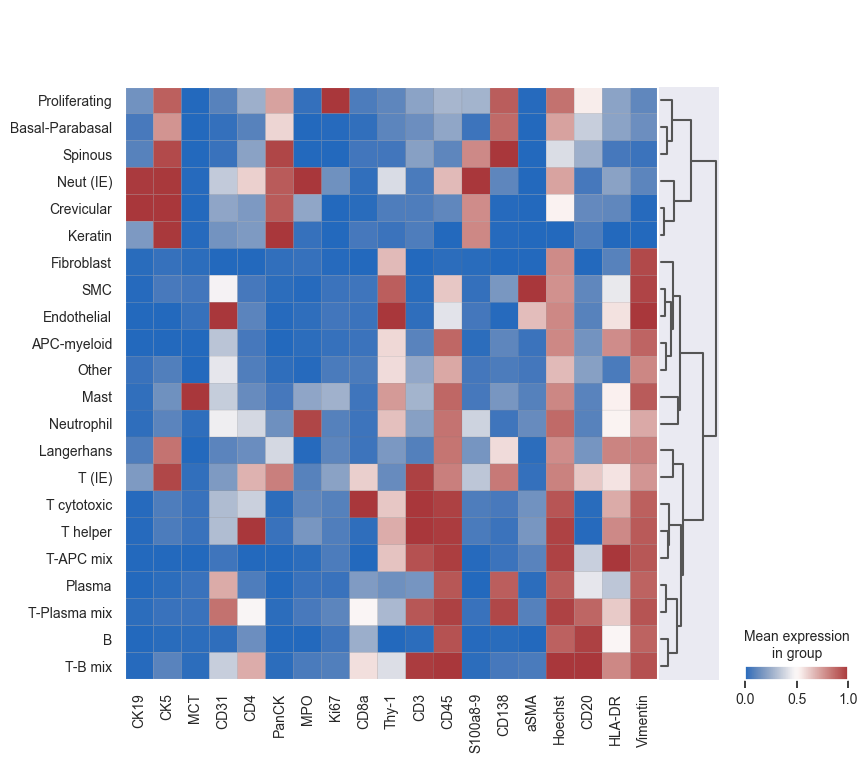

In [50]:
sc.pl.matrixplot(adata, var_names=adata.var.index, groupby='lvl3_spatial_cluster', dendrogram=True, use_raw=False, cmap="vlag", standard_scale='var')

In [51]:
import pandas as pd

# Assuming adata.obs contains 'lvl2_spatial_cluster' and 'lvl3_spatial_clusters'
cluster_counts = (
    adata.obs.groupby(['lvl3_spatial_cluster', 'spatial_cluster']).size().unstack(fill_value=0)
)

# Adjust Pandas display settings to show all columns
pd.set_option('display.max_columns', None)

# Display the full result
print(cluster_counts)

# Reset the option if needed (optional)
pd.reset_option('display.max_columns')


spatial_cluster       APC-myeloid  T-APC mix  APC (perivascular)  Thelper  \
lvl3_spatial_cluster                                                        
APC-myeloid                 34624          0               17885        0   
T helper                        0          0                   0    12164   
T cytotoxic                     0          0                   0        0   
Langerhans                      0          0                   0        0   
SMC                             0          0                   0        0   
T-APC mix                       0      12445                   0        0   
B                               0          0                   0        0   
Basal-Parabasal                 0          0                   0        0   
Crevicular                      0          0                   0        0   
Endothelial                     0          0                   0        0   
Fibroblast                      0          0                   0        0   

In [54]:
import pandas as pd

# Assuming adata.obs contains 'lvl2_spatial_cluster' and 'lvl3_spatial_clusters'
cluster_counts = (
    adata.obs.groupby(['lvl2_spatial_cluster', 'lvl3_spatial_cluster']).size().unstack(fill_value=0)
)

# Adjust Pandas display settings to show all columns
pd.set_option('display.max_columns', None)

# Display the full result
print(cluster_counts)

# Reset the option if needed (optional)
pd.reset_option('display.max_columns')


lvl3_spatial_cluster  APC-myeloid  T helper  T cytotoxic  Langerhans    SMC  \
lvl2_spatial_cluster                                                          
Endothelial                     0         0            0           0      0   
Epi (crevicular)                0         0            0           0      0   
Epi (oral)                      0         0            0           0      0   
Fibroblast                      0         0            0           0      0   
Granulocytic                    0         0            0           0      0   
Lymphoid                        0     12164         6978           0      0   
Myeloid                     52509         0            0        5214      0   
Other                           0         0            0           0      0   
SMC                             0         0            0           0  21941   

lvl3_spatial_cluster  T-APC mix     B  Basal-Parabasal  Crevicular  \
lvl2_spatial_cluster                                        

In [53]:
# Assign the new category to the desired cells
TP_lvl3 = ['T-B mix','T-APC mix']
adata.obs.loc[adata.obs['lvl3_spatial_cluster'].isin(TP_lvl3), 'lvl2_spatial_cluster'] = 'Lymphoid'


In [57]:
import pandas as pd

# Assuming adata.obs contains 'lvl2_spatial_cluster' and 'lvl3_spatial_clusters'
cluster_counts = (
    adata.obs.groupby(['lvl1_spatial_cluster', 'lvl2_spatial_cluster']).size().unstack(fill_value=0)
)

# Adjust Pandas display settings to show all columns
pd.set_option('display.max_columns', None)

# Display the full result
print(cluster_counts)

# Reset the option if needed (optional)
pd.reset_option('display.max_columns')


lvl2_spatial_cluster  Endothelial  Epi (crevicular)  Epi (oral)  Fibroblast  \
lvl1_spatial_cluster                                                          
Epithelial                      0              7637       77837           0   
Fibroblast                      0                 0           0       16251   
Immune                          0                 0           0           0   
Other                           0                 0           0           0   
Vascular                     9171                 0           0           0   

lvl2_spatial_cluster  Granulocytic  Lymphoid  Myeloid  Other    SMC  
lvl1_spatial_cluster                                                 
Epithelial                       0         0        0      0      0  
Fibroblast                       0         0        0      0      0  
Immune                       54651     89952    57723      0      0  
Other                            0         0        0  35625      0  
Vascular                  

In [56]:
# Assign the new category to the desired cells
TP_lvl3 = ['Lymphoid']
adata.obs.loc[adata.obs['lvl2_spatial_cluster'].isin(TP_lvl3), 'lvl1_spatial_cluster'] = 'Immune'


In [71]:
adata.obs['lvl2.5_spatial_cluster'] = adata.obs['lvl3_spatial_cluster'].copy()

In [73]:
# Define the replacement dictionary
replacement_dict = {
    'T-B mix': 'Lymphoid mix',
    'T-Plasma mix': 'Lymphoid mix',
    'T-APC mix': 'Lymphoid mix',
    'Langerhans':'APC-myeloid',
    'Neut (IE)' : 'Neutrophil'
}

# Replace values in the 'spatial_cluster' column
adata.obs['lvl2.5_spatial_cluster'] = adata.obs['lvl2.5_spatial_cluster'].replace(replacement_dict)

In [74]:
# Define the replacement dictionary
replacement_dict = {
    'T (IE)': 'T',
    'T helper': 'T',
    'T cytotoxic': 'T',
}

# Replace values in the 'spatial_cluster' column
adata.obs['lvl2.5_spatial_cluster'] = adata.obs['lvl2.5_spatial_cluster'].replace(replacement_dict)

In [76]:
import scanpy as sc
sc.tl.dendrogram(adata, groupby='lvl2.5_spatial_cluster')


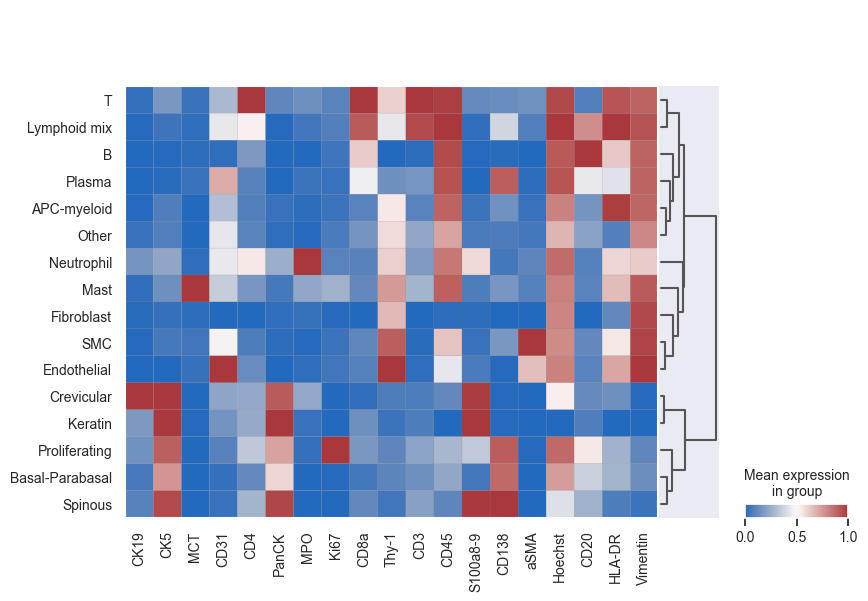

In [77]:
sc.pl.matrixplot(adata, var_names=adata.var.index, groupby='lvl2.5_spatial_cluster', dendrogram=True, use_raw=False, cmap="vlag", standard_scale='var')

In [78]:
import pandas as pd

# Assuming adata.obs contains 'lvl2_spatial_cluster' and 'lvl3_spatial_clusters'
cluster_counts = (
    adata.obs.groupby(['lvl2.5_spatial_cluster', 'lvl3_spatial_cluster']).size().unstack(fill_value=0)
)

# Adjust Pandas display settings to show all columns
pd.set_option('display.max_columns', None)

# Display the full result
print(cluster_counts)

# Reset the option if needed (optional)
pd.reset_option('display.max_columns')


lvl3_spatial_cluster    APC-myeloid  T helper  T cytotoxic  Langerhans    SMC  \
lvl2.5_spatial_cluster                                                          
APC-myeloid                   52509         0            0        5214      0   
SMC                               0         0            0           0  21941   
B                                 0         0            0           0      0   
Basal-Parabasal                   0         0            0           0      0   
Crevicular                        0         0            0           0      0   
Endothelial                       0         0            0           0      0   
Fibroblast                        0         0            0           0      0   
T                                 0     12164         6978           0      0   
Keratin                           0         0            0           0      0   
Mast                              0         0            0           0      0   
Neutrophil                  

In [48]:
adata.write_h5ad("/data/vasileiosionat2/IBEX_FINAL/Scimap/Adata/adata_ROIs.h5ad")

In [2]:
unique_values = adata.obs['spatial_cluster'].unique().tolist()
print(unique_values)

['Keratin Epi', 'Langerhans', 'Thy1(-) Fibroblast', 'Spinous Epithelial', 'Intraepithelial Neutrophil', 'Thy1(+) Fibroblast', 'Proliferating Epi', 'Basal-Parabasal Epi', 'ECM-Vim(+)', 'S100a8-9(-) Neutrophil', 'APC (perivascular)', 'Crevicular Epi', 'APC-myeloid', 'Mast', 'T cytotoxic', 'Plasma', 'T-APC mix', 'aSMA(-) Endothelial', 'Endothelial-Immune mix', 'HLA-DR(+) Endothelial', 'Neutrophil (BV-associated)', 'Thy1-CD45(+) cell', 'Intraepithelial T', 'HLA-DR(+) Fibroblast', 'Endothelial', 'HLA-DR(+) SMC', 'S100a-9(+) Neutrophil-CT', 'Tcytotoxic-B mix', 'SMC', 'T-Plasma mix', 'Unclear', 'Thelper', 'Thelper-B mix', 'B']


In [3]:
import scanpy as sc

# Define the replacement dictionary
replacement_dict = {
    'Keratin Epi': 'Ep.k', 
    'Langerhans' : 'Lang',
    'Thy1(-) Fibroblast': 'Fib.Thy1(-)',
    'Spinous Epithelial': 'Ep.sp',
    'Intraepithelial Neutrophil': 'Neut.IE',
    'Thy1(+) Fibroblast':'Fib.Thy1(+)',
    'Proliferating Epi': 'Ep.prol',
    'Basal-Parabasal Epi': 'Ep.b-pb',
    'ECM-Vim(+)' : 'ECM.Vim(+)',
    'S100a8-9(-) Neutrophil': 'Neut.S100a8-9(-)',
    'APC (perivascular)':'APCmyel.perivasc',
    'Crevicular Epi':'Ep.crev',
    'APC-myeloid':'APC.myel',
    'Mast': 'Mast',
    'T cytotoxic': 'T.cyt',
    'Plasma':'Plasma',
    'T-APC mix':'T.APCmyel.mix',
    'aSMA(-) Endothelial':'En.aSMA(-)',
    'Endothelial-Immune mix':'En.Im.mix',
    'HLA-DR(+) Endothelial': 'En.HLA-DR(+)',
    'Neutrophil (BV-associated)':'Neut.BV',
    'Thy1-CD45(+) cell': 'Thy1.CD45.cell',
    'Intraepithelial T': 'T.IE',
    'HLA-DR(+) Fibroblast':'Fib.HLA-DR(+)',
    'Endothelial': 'En.HLA-DR(-)',
    'HLA-DR(+) SMC':'SMC.HLA-DR(+)',
    'S100a-9(+) Neutrophil-CT':'Neut.S100a8-9.CT',
    'Tcytotoxic-B mix': 'Tcyt.B.mix',
    'SMC': 'SMC.HLA-DR(-)',
    'T-Plasma mix': 'Pl.T.mix',
    'Unclear':'Unclear',
    'Thelper':'T.h',
    'Thelper-B mix':'Th.B.mix',
    'B': 'B'
}

# Replace values in the 'lvl3_spatial_cluster' column
adata.obs['spatial_cluster'] = adata.obs['spatial_cluster'].replace(replacement_dict)

# Print unique values after replacement
print(adata.obs['spatial_cluster'].unique())


['Ep.k', 'Lang', 'Fib.Thy1(-)', 'Ep.sp', 'Neut.IE', ..., 'Pl.T.mix', 'Unclear', 'T.h', 'Th.B.mix', 'B']
Length: 34
Categories (34, object): ['APC.myel', 'T.APCmyel.mix', 'APCmyel.perivasc', 'T.h', ..., 'Pl.T.mix', 'Ep.prol', 'Ep.sp', 'Ep.k']


In [4]:
unique_values = adata.obs['spatial_cluster'].unique().tolist()
print(unique_values)

['Ep.k', 'Lang', 'Fib.Thy1(-)', 'Ep.sp', 'Neut.IE', 'Fib.Thy1(+)', 'Ep.prol', 'Ep.b-pb', 'ECM.Vim(+)', 'Neut.S100a8-9(-)', 'APCmyel.perivasc', 'Ep.crev', 'APC.myel', 'Mast', 'T.cyt', 'Plasma', 'T.APCmyel.mix', 'En.aSMA(-)', 'En.Im.mix', 'En.HLA-DR(+)', 'Neut.BV', 'Thy1.CD45.cell', 'T.IE', 'Fib.HLA-DR(+)', 'En.HLA-DR(-)', 'SMC.HLA-DR(+)', 'Neut.S100a8-9.CT', 'Tcyt.B.mix', 'SMC.HLA-DR(-)', 'Pl.T.mix', 'Unclear', 'T.h', 'Th.B.mix', 'B']


In [7]:
import scanpy as sc
sc.tl.dendrogram(adata, groupby='spatial_cluster')


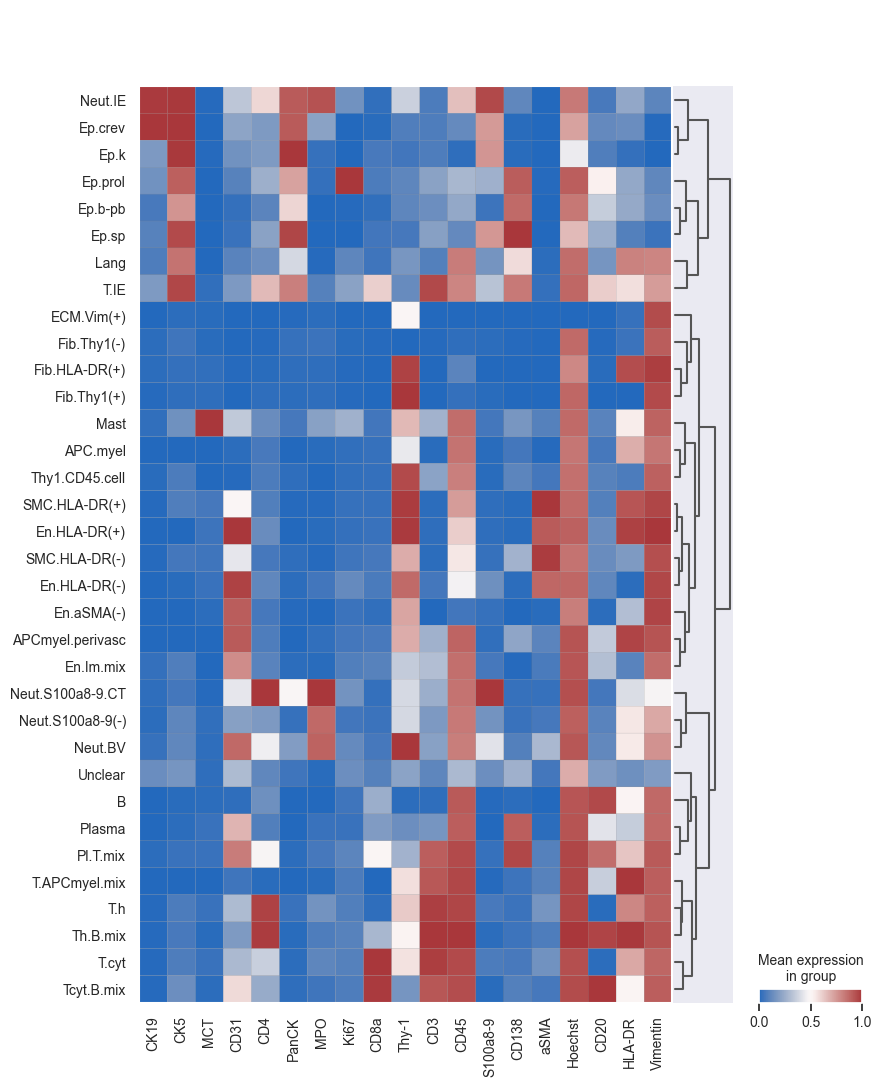

In [8]:
sc.pl.matrixplot(adata, var_names=adata.var.index, groupby='spatial_cluster', dendrogram=True, use_raw=False, cmap="vlag", standard_scale='var')

In [9]:
unique_values = adata.obs['lvl3_spatial_cluster'].unique().tolist()
print(unique_values)

['Keratin', 'Langerhans', 'Fibroblast', 'Spinous', 'Neut (IE)', 'Proliferating', 'Basal-Parabasal', 'Other', 'Neutrophil', 'APC-myeloid', 'Crevicular', 'Mast', 'T cytotoxic', 'Plasma', 'T-APC mix', 'Endothelial', 'T (IE)', 'SMC', 'T-B mix', 'T-Plasma mix', 'T helper', 'B']


In [10]:
# Define the replacement dictionary
replacement_dict = {
    'T-APC mix': 'T-APC.myel mix',
    'T-Plasma mix': 'Plasma-T mix' 
}

# Replace values in the 'lvl3_spatial_cluster' column
adata.obs['lvl3_spatial_cluster'] = adata.obs['lvl3_spatial_cluster'].replace(replacement_dict)

# Print unique values after replacement
print(adata.obs['lvl3_spatial_cluster'].unique())

['Keratin', 'Langerhans', 'Fibroblast', 'Spinous', 'Neut (IE)', ..., 'SMC', 'T-B mix', 'Plasma-T mix', 'T helper', 'B']
Length: 22
Categories (22, object): ['APC-myeloid', 'T helper', 'T cytotoxic', 'Langerhans', ..., 'Spinous', 'Neut (IE)', 'Plasma-T mix', 'T-B mix']


In [11]:
unique_values = adata.obs['lvl3_spatial_cluster'].unique().tolist()
print(unique_values)

['Keratin', 'Langerhans', 'Fibroblast', 'Spinous', 'Neut (IE)', 'Proliferating', 'Basal-Parabasal', 'Other', 'Neutrophil', 'APC-myeloid', 'Crevicular', 'Mast', 'T cytotoxic', 'Plasma', 'T-APC.myel mix', 'Endothelial', 'T (IE)', 'SMC', 'T-B mix', 'Plasma-T mix', 'T helper', 'B']


In [12]:
import scanpy as sc
sc.tl.dendrogram(adata, groupby='lvl3_spatial_cluster')


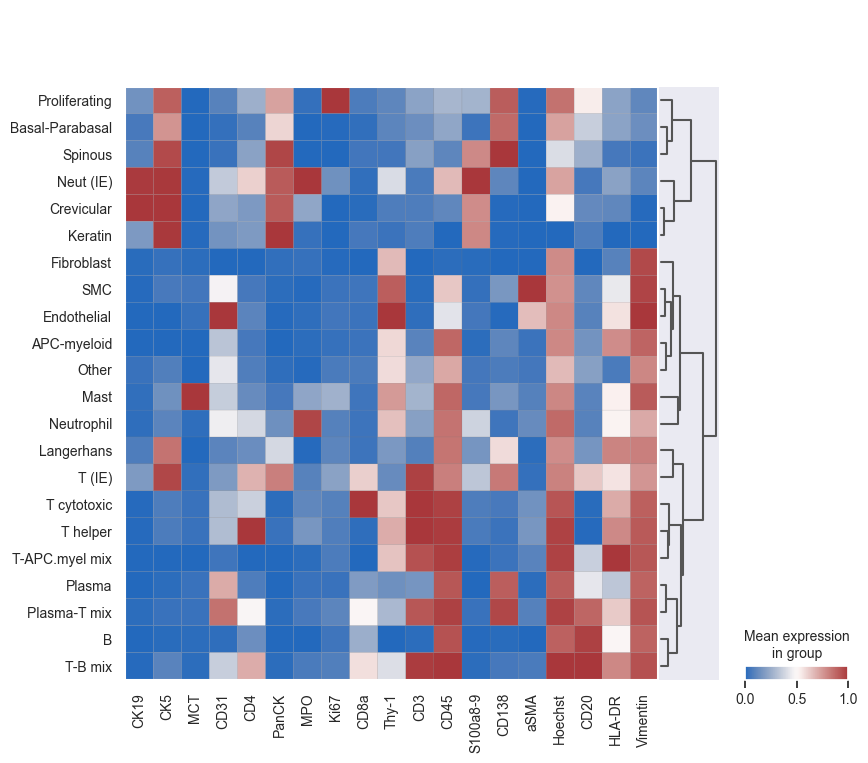

In [13]:
sc.pl.matrixplot(adata, var_names=adata.var.index, groupby='lvl3_spatial_cluster', dendrogram=True, use_raw=False, cmap="vlag", standard_scale='var')

In [14]:
unique_values = adata.obs['lvl2.5_spatial_cluster'].unique().tolist()
print(unique_values)

['Keratin', 'APC-myeloid', 'Fibroblast', 'Spinous', 'Neutrophil', 'Proliferating', 'Basal-Parabasal', 'Other', 'Crevicular', 'Mast', 'T', 'Plasma', 'Lymphoid mix', 'Endothelial', 'SMC', 'B']


In [15]:
# Define the replacement dictionary
replacement_dict = {
    'Lymphoid mix' :'T-APC mix', 
}

# Replace values in the 'lvl3_spatial_cluster' column
adata.obs['lvl2.5_spatial_cluster'] = adata.obs['lvl2.5_spatial_cluster'].replace(replacement_dict)

# Print unique values after replacement
print(adata.obs['lvl2.5_spatial_cluster'].unique())

['Keratin', 'APC-myeloid', 'Fibroblast', 'Spinous', 'Neutrophil', ..., 'Plasma', 'T-APC mix', 'Endothelial', 'SMC', 'B']
Length: 16
Categories (16, object): ['APC-myeloid', 'SMC', 'B', 'Basal-Parabasal', ..., 'Plasma', 'Proliferating', 'Spinous', 'T-APC mix']


In [16]:
unique_values = adata.obs['lvl2.5_spatial_cluster'].unique().tolist()
print(unique_values)

['Keratin', 'APC-myeloid', 'Fibroblast', 'Spinous', 'Neutrophil', 'Proliferating', 'Basal-Parabasal', 'Other', 'Crevicular', 'Mast', 'T', 'Plasma', 'T-APC mix', 'Endothelial', 'SMC', 'B']


In [17]:
# Add the new category to the list of allowed categories
adata.obs['lvl2.5_spatial_cluster'] = adata.obs['lvl2.5_spatial_cluster'].cat.add_categories(['Plasma-T mix'])

# Assign the new category to the desired cells
TP_lvl3 = ['Plasma-T mix']
adata.obs.loc[adata.obs['lvl3_spatial_cluster'].isin(TP_lvl3), 'lvl2.5_spatial_cluster'] = 'Plasma-T mix'

In [18]:
unique_values = adata.obs['lvl2.5_spatial_cluster'].unique().tolist()
print(unique_values)

['Keratin', 'APC-myeloid', 'Fibroblast', 'Spinous', 'Neutrophil', 'Proliferating', 'Basal-Parabasal', 'Other', 'Crevicular', 'Mast', 'T', 'Plasma', 'T-APC mix', 'Endothelial', 'SMC', 'Plasma-T mix', 'B']


In [19]:
import scanpy as sc
sc.tl.dendrogram(adata, groupby='lvl2.5_spatial_cluster')


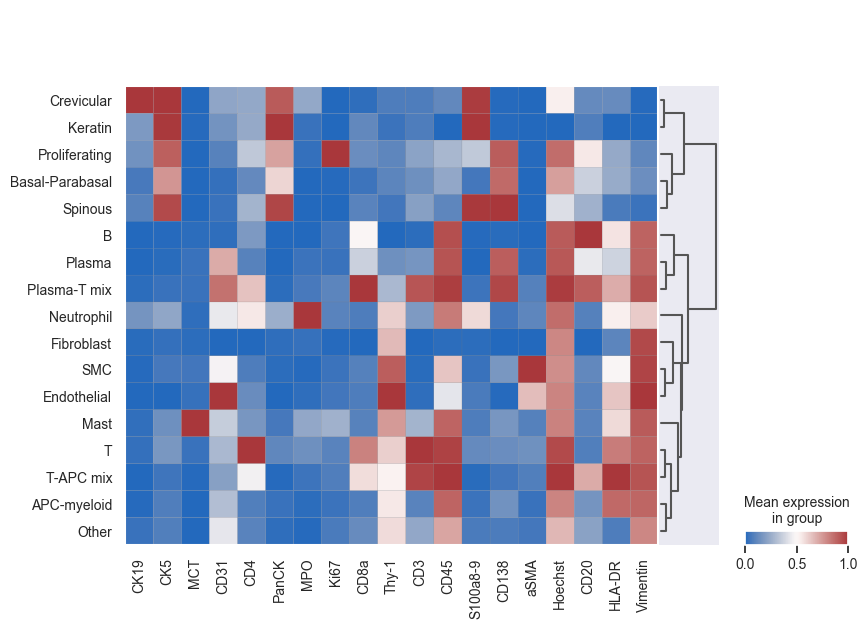

In [20]:
sc.pl.matrixplot(adata, var_names=adata.var.index, groupby='lvl2.5_spatial_cluster', dendrogram=True, use_raw=False, cmap="vlag", standard_scale='var')

In [21]:
unique_values = adata.obs['lvl2_spatial_cluster'].unique().tolist()
print(unique_values)

['Epi (oral)', 'Myeloid', 'Fibroblast', 'Granulocytic', 'Other', 'Epi (crevicular)', 'Lymphoid', 'Endothelial', 'SMC']


In [22]:
import scanpy as sc
sc.tl.dendrogram(adata, groupby='lvl2_spatial_cluster')


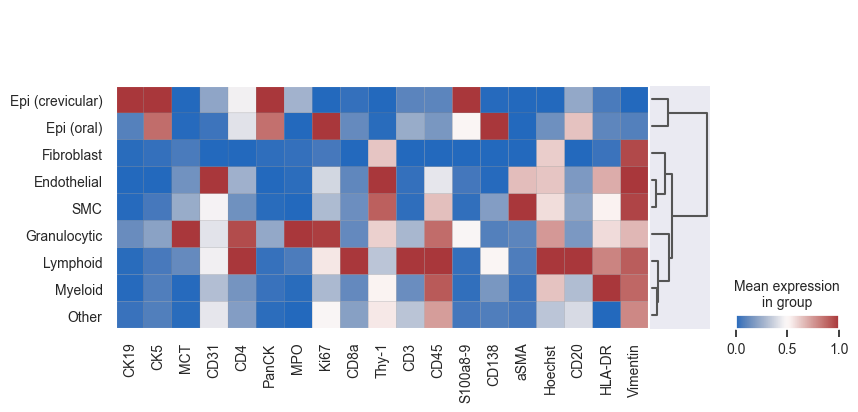

In [6]:
sc.pl.matrixplot(adata, var_names=adata.var.index, groupby='lvl2_spatial_cluster', dendrogram=True, use_raw=False, cmap="vlag", standard_scale='var')

In [24]:
unique_values = adata.obs['lvl1_spatial_cluster'].unique().tolist()
print(unique_values)

['Epithelial', 'Immune', 'Fibroblast', 'Other', 'Vascular']


In [25]:
import scanpy as sc
sc.tl.dendrogram(adata, groupby='lvl1_spatial_cluster')


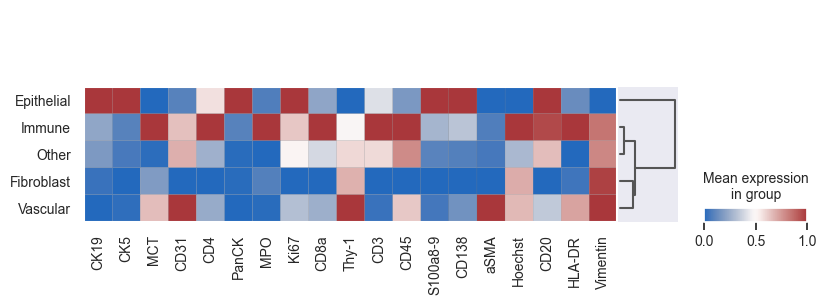

In [26]:
sc.pl.matrixplot(adata, var_names=adata.var.index, groupby='lvl1_spatial_cluster', dendrogram=True, use_raw=False, cmap="vlag", standard_scale='var')

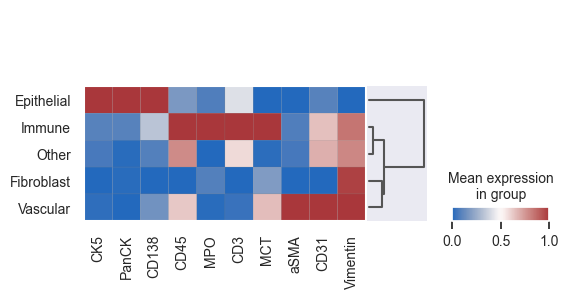

In [47]:
import scanpy as sc

# Ensure the dendrogram information is calculated for the grouping
sc.tl.dendrogram(adata, groupby='lvl1_spatial_cluster')

# Subset of genes you want to plot
correct_order = ['CK5', 'PanCK', 'CD138', 'CD45', 'MPO', 'CD3', 'MCT', 'aSMA', 'CD31', 'Vimentin']

# Create a DotPlot instance with the desired settings
dotplot = sc.pl.matrixplot(
    adata, 
    var_names=correct_order, 
    groupby='lvl1_spatial_cluster', 
    dendrogram=True, 
    use_raw=False, 
    cmap="vlag",  # Use shades of grey
    standard_scale='var'
)

/gpfs/gsfs12/users/vasileiosionat2/conda/envs/scimap-naparijroi/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored



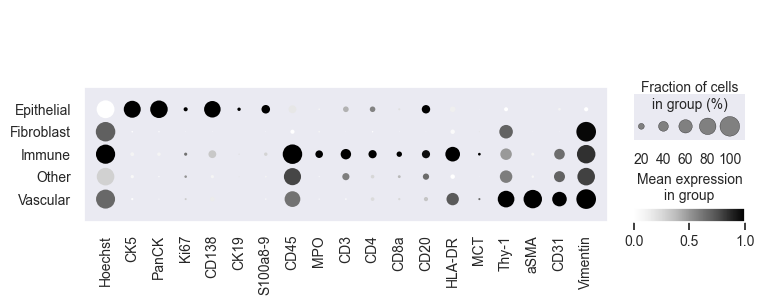

In [27]:
import scanpy as sc

# Ensure the dendrogram information is calculated for the grouping
sc.tl.dendrogram(adata, groupby='lvl1_spatial_cluster')

# Subset of genes you want to plot
correct_order = ['Hoechst', 'CK5', 'PanCK', 'Ki67', 'CD138', 'CK19', 'S100a8-9', 'CD45', 'MPO', 'CD3', 'CD4', 'CD8a', 'CD20', 'HLA-DR', 'MCT', 'Thy-1', 'aSMA', 'CD31', 'Vimentin']

# Create a DotPlot instance with the desired settings
dotplot = sc.pl.DotPlot(
    adata, 
    var_names=correct_order, 
    groupby='lvl1_spatial_cluster', 
    use_raw=False, 
    cmap="Greys",  # Use shades of grey
    standard_scale='var'
)

# Remove the outline of dots
dotplot.style(dot_edge_color=None)

# Display the plot with dendrogram
dotplot.show()



/gpfs/gsfs12/users/vasileiosionat2/conda/envs/scimap-naparijroi/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored



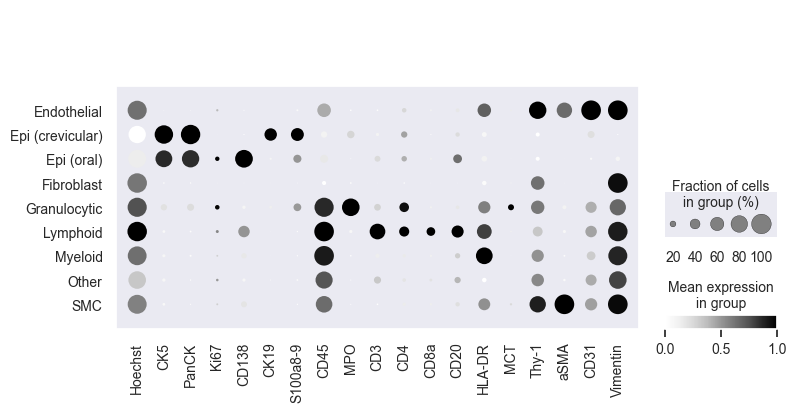

In [28]:
import scanpy as sc

# Ensure the dendrogram information is calculated for the grouping
sc.tl.dendrogram(adata, groupby='lvl2_spatial_cluster')

# Subset of genes you want to plot
correct_order = ['Hoechst', 'CK5', 'PanCK', 'Ki67', 'CD138', 'CK19', 'S100a8-9', 'CD45', 'MPO', 'CD3', 'CD4', 'CD8a', 'CD20', 'HLA-DR', 'MCT', 'Thy-1', 'aSMA', 'CD31', 'Vimentin']

# Create a DotPlot instance with the desired settings
dotplot = sc.pl.DotPlot(
    adata, 
    var_names=correct_order, 
    groupby='lvl2_spatial_cluster', 
    use_raw=False, 
    cmap="Greys",  # Use shades of grey
    standard_scale='var'
)

# Remove the outline of dots
dotplot.style(dot_edge_color=None)

# Display the plot with dendrogram
dotplot.show()



/gpfs/gsfs12/users/vasileiosionat2/conda/envs/scimap-naparijroi/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored



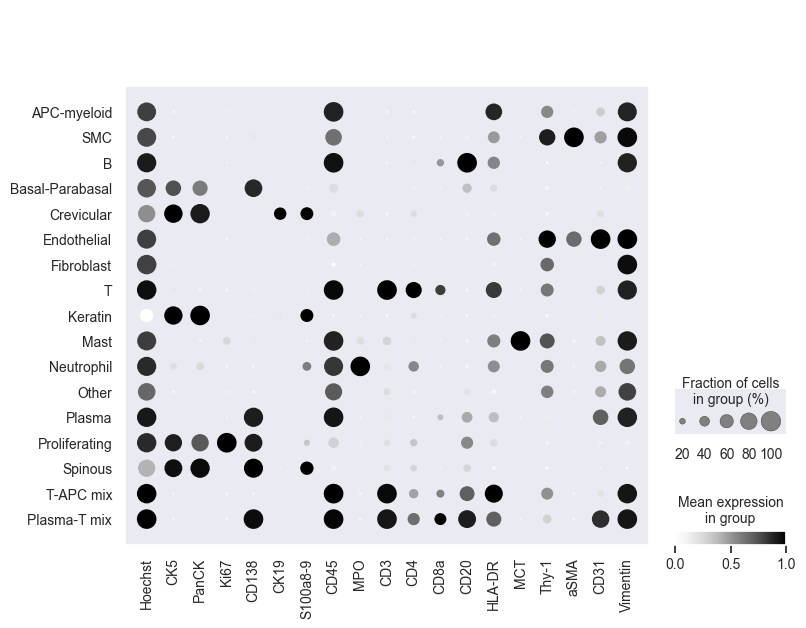

In [29]:
import scanpy as sc

# Ensure the dendrogram information is calculated for the grouping
sc.tl.dendrogram(adata, groupby='lvl2.5_spatial_cluster')

# Subset of genes you want to plot
correct_order = ['Hoechst', 'CK5', 'PanCK', 'Ki67', 'CD138', 'CK19', 'S100a8-9', 'CD45', 'MPO', 'CD3', 'CD4', 'CD8a', 'CD20', 'HLA-DR', 'MCT', 'Thy-1', 'aSMA', 'CD31', 'Vimentin']

# Create a DotPlot instance with the desired settings
dotplot = sc.pl.DotPlot(
    adata, 
    var_names=correct_order, 
    groupby='lvl2.5_spatial_cluster', 
    use_raw=False, 
    cmap="Greys",  # Use shades of grey
    standard_scale='var'
)

# Remove the outline of dots
dotplot.style(dot_edge_color=None)

# Display the plot with dendrogram
dotplot.show()



/gpfs/gsfs12/users/vasileiosionat2/conda/envs/scimap-naparijroi/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored



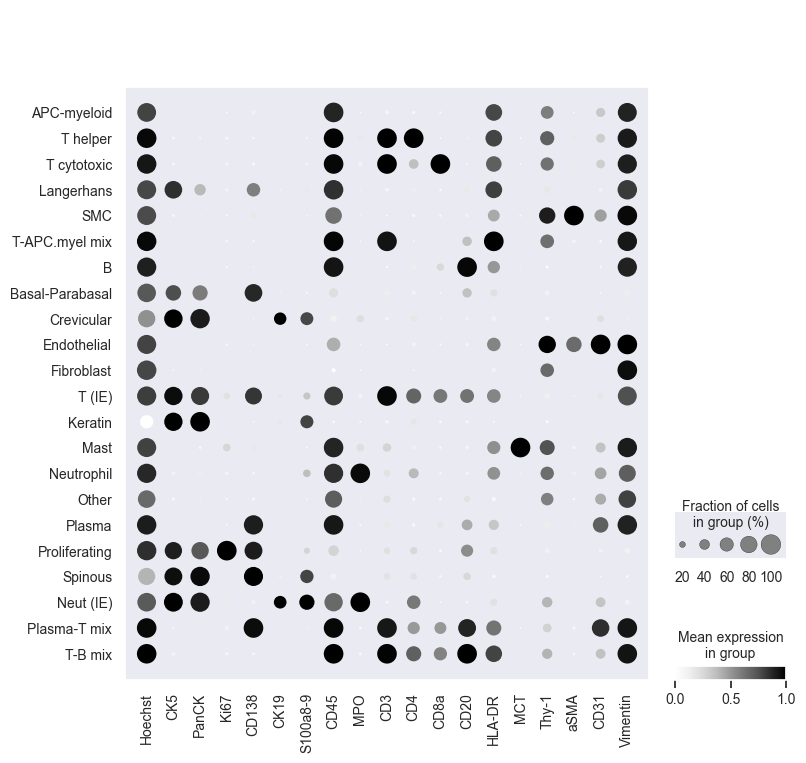

In [30]:
import scanpy as sc

# Ensure the dendrogram information is calculated for the grouping
sc.tl.dendrogram(adata, groupby='lvl3_spatial_cluster')

# Subset of genes you want to plot
correct_order = ['Hoechst', 'CK5', 'PanCK', 'Ki67', 'CD138', 'CK19', 'S100a8-9', 'CD45', 'MPO', 'CD3', 'CD4', 'CD8a', 'CD20', 'HLA-DR', 'MCT', 'Thy-1', 'aSMA', 'CD31', 'Vimentin']

# Create a DotPlot instance with the desired settings
dotplot = sc.pl.DotPlot(
    adata, 
    var_names=correct_order, 
    groupby='lvl3_spatial_cluster', 
    use_raw=False, 
    cmap="Greys",  # Use shades of grey
    standard_scale='var'
)

# Remove the outline of dots
dotplot.style(dot_edge_color=None)

# Display the plot with dendrogram
dotplot.show()



/gpfs/gsfs12/users/vasileiosionat2/conda/envs/scimap-naparijroi/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored



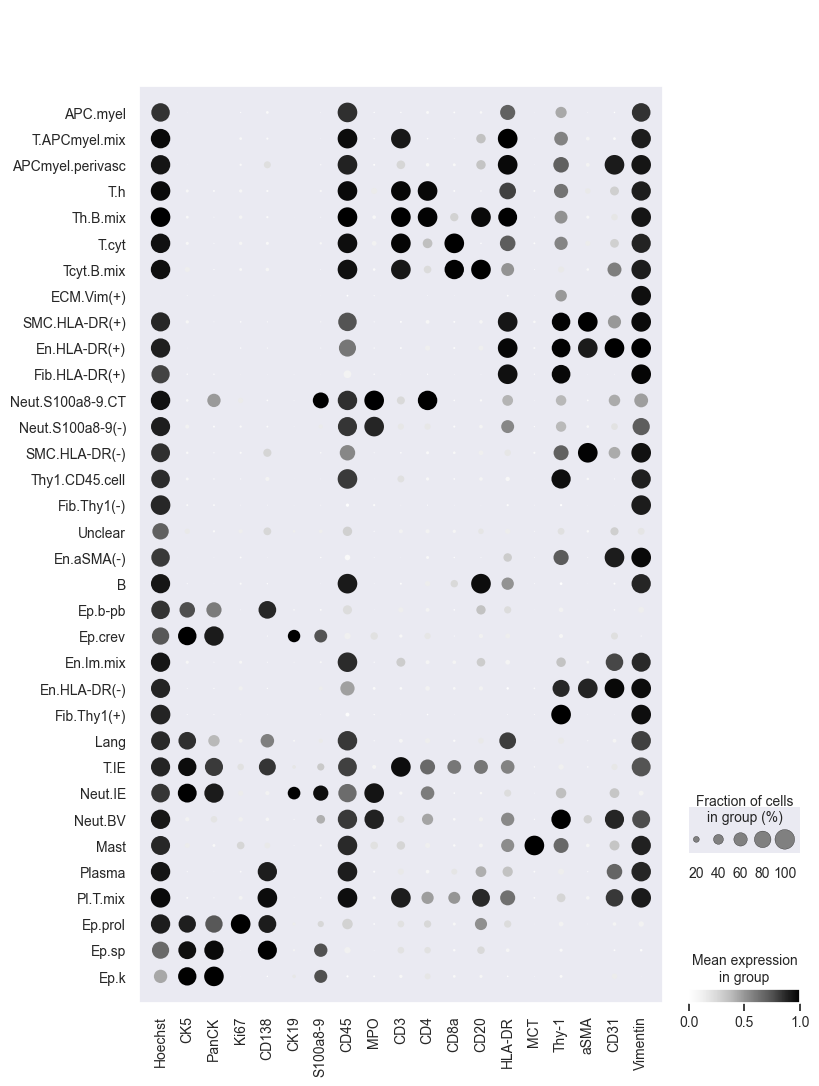

In [31]:
import scanpy as sc

# Ensure the dendrogram information is calculated for the grouping
sc.tl.dendrogram(adata, groupby='spatial_cluster')

# Subset of genes you want to plot
correct_order = ['Hoechst', 'CK5', 'PanCK', 'Ki67', 'CD138', 'CK19', 'S100a8-9', 'CD45', 'MPO', 'CD3', 'CD4', 'CD8a', 'CD20', 'HLA-DR', 'MCT', 'Thy-1', 'aSMA', 'CD31', 'Vimentin']

# Create a DotPlot instance with the desired settings
dotplot = sc.pl.DotPlot(
    adata, 
    var_names=correct_order, 
    groupby='spatial_cluster', 
    use_raw=False, 
    cmap="Greys",  # Use shades of grey
    standard_scale='var'
)

# Remove the outline of dots
dotplot.style(dot_edge_color=None)

# Display the plot with dendrogram
dotplot.show()



/gpfs/gsfs12/users/vasileiosionat2/conda/envs/scimap-naparijroi/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored



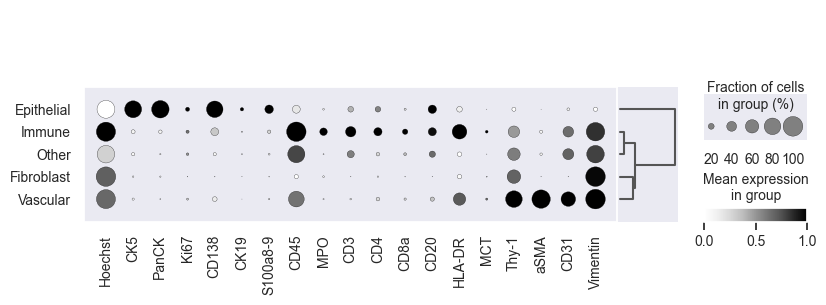

In [32]:
import scanpy as sc

# Ensure the dendrogram information is calculated for the grouping
sc.tl.dendrogram(adata, groupby='lvl1_spatial_cluster')

# Subset of genes you want to plot
correct_order = ['Hoechst', 'CK5', 'PanCK', 'Ki67', 'CD138', 'CK19', 'S100a8-9', 'CD45', 'MPO', 'CD3', 'CD4', 'CD8a', 'CD20', 'HLA-DR', 'MCT', 'Thy-1', 'aSMA', 'CD31', 'Vimentin']

# Create a DotPlot instance with the desired settings
dotplot = sc.pl.dotplot(
    adata, 
    var_names=correct_order, 
    groupby='lvl1_spatial_cluster', 
    dendrogram=True, 
    use_raw=False, 
    cmap="Greys",  # Use shades of grey
    standard_scale='var'
)

/gpfs/gsfs12/users/vasileiosionat2/conda/envs/scimap-naparijroi/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored



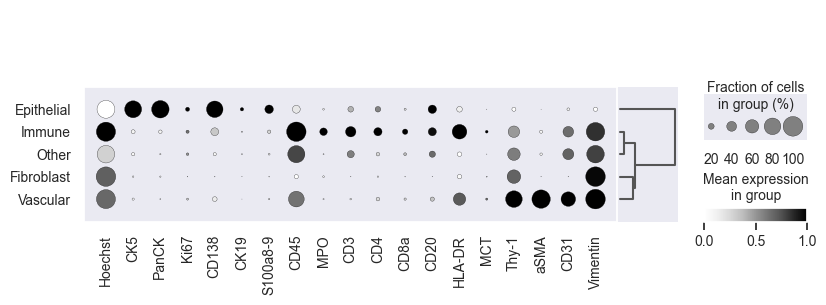

In [33]:
import scanpy as sc

# Ensure the dendrogram information is calculated for the grouping
sc.tl.dendrogram(adata, groupby='lvl2_spatial_cluster')

# Subset of genes you want to plot
correct_order = ['Hoechst', 'CK5', 'PanCK', 'Ki67', 'CD138', 'CK19', 'S100a8-9', 'CD45', 'MPO', 'CD3', 'CD4', 'CD8a', 'CD20', 'HLA-DR', 'MCT', 'Thy-1', 'aSMA', 'CD31', 'Vimentin']

# Create a DotPlot instance with the desired settings
dotplot = sc.pl.dotplot(
    adata, 
    var_names=correct_order, 
    groupby='lvl1_spatial_cluster', 
    dendrogram=True, 
    use_raw=False, 
    cmap="Greys",  # Use shades of grey
    standard_scale='var'
)

/gpfs/gsfs12/users/vasileiosionat2/conda/envs/scimap-naparijroi/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored



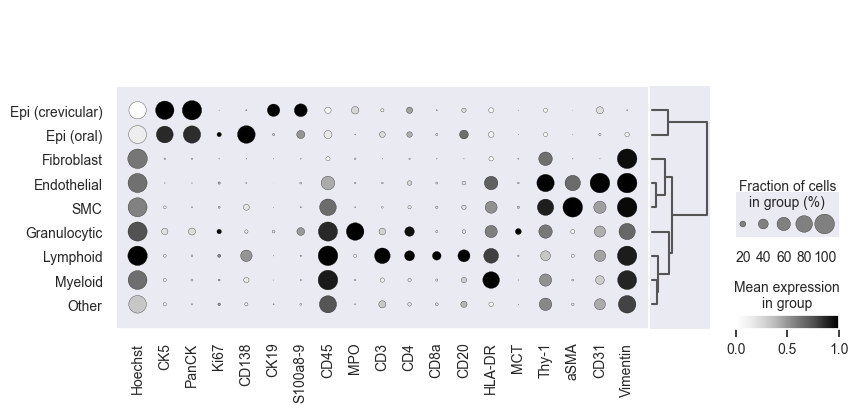

In [34]:
import scanpy as sc

# Ensure the dendrogram information is calculated for the grouping
sc.tl.dendrogram(adata, groupby='lvl2_spatial_cluster')

# Subset of genes you want to plot
correct_order = ['Hoechst', 'CK5', 'PanCK', 'Ki67', 'CD138', 'CK19', 'S100a8-9', 'CD45', 'MPO', 'CD3', 'CD4', 'CD8a', 'CD20', 'HLA-DR', 'MCT', 'Thy-1', 'aSMA', 'CD31', 'Vimentin']

# Create a DotPlot instance with the desired settings
dotplot = sc.pl.dotplot(
    adata, 
    var_names=correct_order, 
    groupby='lvl2_spatial_cluster', 
    dendrogram=True, 
    use_raw=False, 
    cmap="Greys",  # Use shades of grey
    standard_scale='var'
)

/gpfs/gsfs12/users/vasileiosionat2/conda/envs/scimap-naparijroi/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored



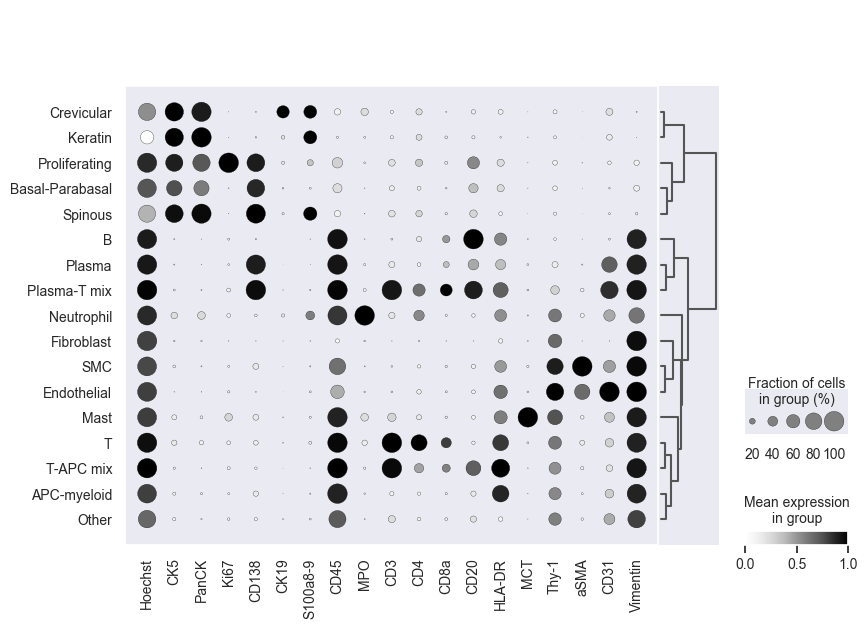

In [35]:
import scanpy as sc

# Ensure the dendrogram information is calculated for the grouping
sc.tl.dendrogram(adata, groupby='lvl2.5_spatial_cluster')

# Subset of genes you want to plot
correct_order = ['Hoechst', 'CK5', 'PanCK', 'Ki67', 'CD138', 'CK19', 'S100a8-9', 'CD45', 'MPO', 'CD3', 'CD4', 'CD8a', 'CD20', 'HLA-DR', 'MCT', 'Thy-1', 'aSMA', 'CD31', 'Vimentin']

# Create a DotPlot instance with the desired settings
dotplot = sc.pl.dotplot(
    adata, 
    var_names=correct_order, 
    groupby='lvl2.5_spatial_cluster', 
    dendrogram=True, 
    use_raw=False, 
    cmap="Greys",  # Use shades of grey
    standard_scale='var'
)

/gpfs/gsfs12/users/vasileiosionat2/conda/envs/scimap-naparijroi/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored



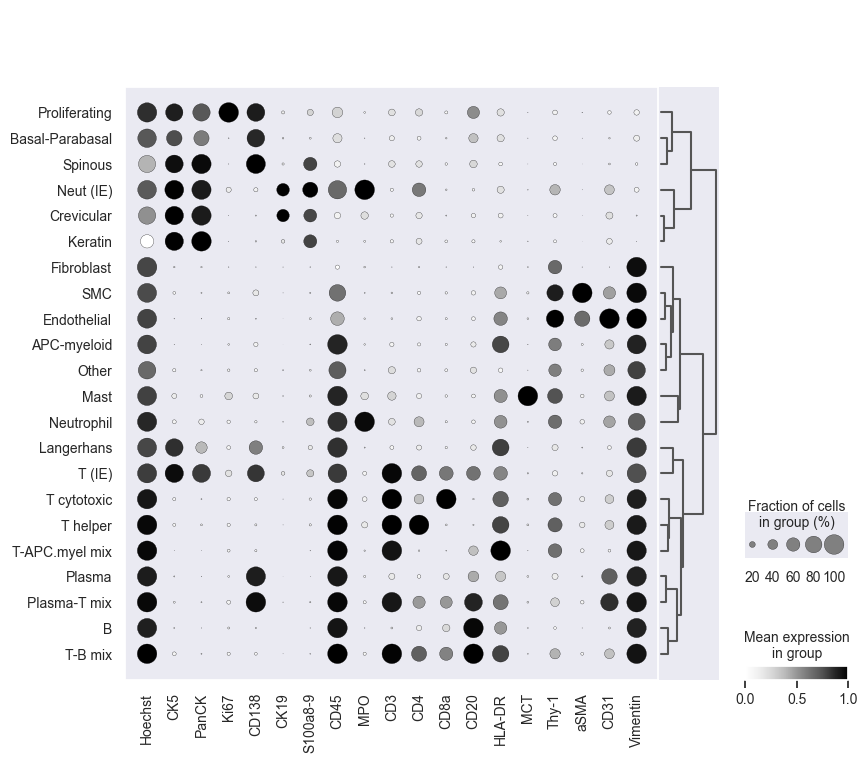

In [36]:
import scanpy as sc

# Ensure the dendrogram information is calculated for the grouping
sc.tl.dendrogram(adata, groupby='lvl3_spatial_cluster')

# Subset of genes you want to plot
correct_order = ['Hoechst', 'CK5', 'PanCK', 'Ki67', 'CD138', 'CK19', 'S100a8-9', 'CD45', 'MPO', 'CD3', 'CD4', 'CD8a', 'CD20', 'HLA-DR', 'MCT', 'Thy-1', 'aSMA', 'CD31', 'Vimentin']

# Create a DotPlot instance with the desired settings
dotplot = sc.pl.dotplot(
    adata, 
    var_names=correct_order, 
    groupby='lvl3_spatial_cluster', 
    dendrogram=True, 
    use_raw=False, 
    cmap="Greys",  # Use shades of grey
    standard_scale='var'
)

/gpfs/gsfs12/users/vasileiosionat2/conda/envs/scimap-naparijroi/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored



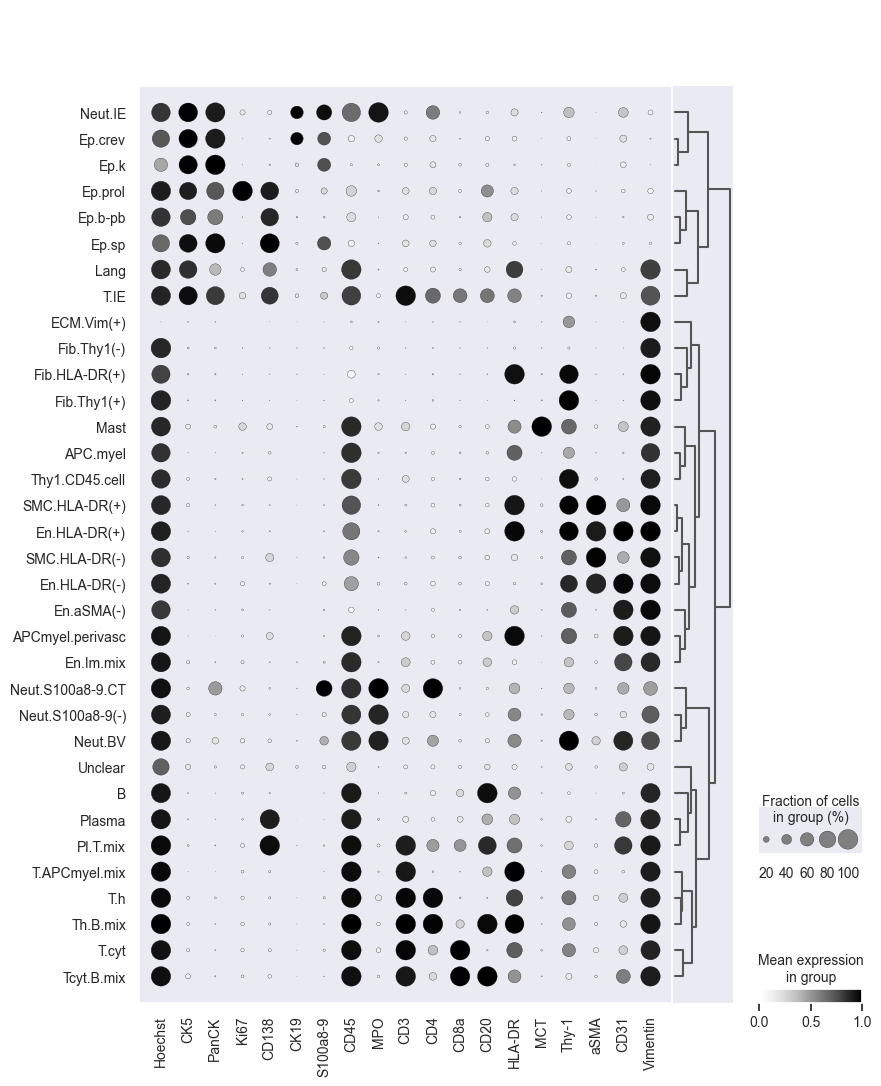

In [37]:
import scanpy as sc

# Ensure the dendrogram information is calculated for the grouping
sc.tl.dendrogram(adata, groupby='spatial_cluster')

# Subset of genes you want to plot
correct_order = ['Hoechst', 'CK5', 'PanCK', 'Ki67', 'CD138', 'CK19', 'S100a8-9', 'CD45', 'MPO', 'CD3', 'CD4', 'CD8a', 'CD20', 'HLA-DR', 'MCT', 'Thy-1', 'aSMA', 'CD31', 'Vimentin']

# Create a DotPlot instance with the desired settings
dotplot = sc.pl.dotplot(
    adata, 
    var_names=correct_order, 
    groupby='spatial_cluster', 
    dendrogram=True, 
    use_raw=False, 
    cmap="Greys",  # Use shades of grey
    standard_scale='var'
)

/gpfs/gsfs12/users/vasileiosionat2/conda/envs/scimap-naparijroi/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored



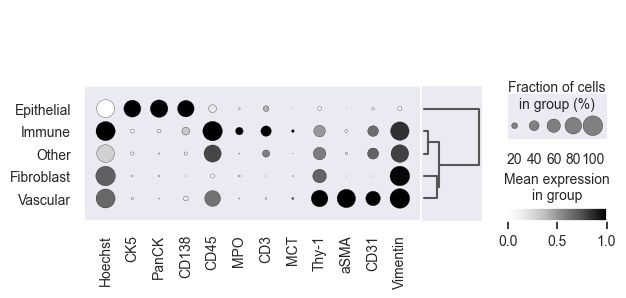

In [38]:
import scanpy as sc

# Ensure the dendrogram information is calculated for the grouping
sc.tl.dendrogram(adata, groupby='lvl1_spatial_cluster')

# Subset of genes you want to plot
correct_order = ['Hoechst', 'CK5', 'PanCK', 'CD138', 'CD45', 'MPO', 'CD3', 'MCT', 'Thy-1', 'aSMA', 'CD31', 'Vimentin']

# Create a DotPlot instance with the desired settings
dotplot = sc.pl.dotplot(
    adata, 
    var_names=correct_order, 
    groupby='lvl1_spatial_cluster', 
    dendrogram=True, 
    use_raw=False, 
    cmap="Greys",  # Use shades of grey
    standard_scale='var'
)

In [40]:
import pandas as pd

# Assuming adata.obs contains 'lvl2_spatial_cluster' and 'lvl3_spatial_clusters'
cluster_counts = (
    adata.obs.groupby(['spatial_cluster', 'lvl1_spatial_cluster']).size().unstack(fill_value=0)
)

# Adjust Pandas display settings to show all columns
pd.set_option('display.max_columns', None)

# Display the full result
print(cluster_counts)

# Reset the option if needed (optional)
pd.reset_option('display.max_columns')

lvl1_spatial_cluster  Epithelial  Fibroblast  Immune  Other  Vascular
spatial_cluster                                                      
APC.myel                       0           0   34624      0         0
T.APCmyel.mix                  0           0   12445      0         0
APCmyel.perivasc               0           0   17885      0         0
T.h                            0           0   12164      0         0
Th.B.mix                       0           0    7474      0         0
T.cyt                          0           0    6978      0         0
Tcyt.B.mix                     0           0    5187      0         0
ECM.Vim(+)                     0           0       0   2677         0
SMC.HLA-DR(+)                  0           0       0      0      8061
En.HLA-DR(+)                   0           0       0      0      4598
Fib.HLA-DR(+)                  0        1744       0      0         0
Neut.S100a8-9.CT               0           0    5472      0         0
Neut.S100a8-9(-)    

In [41]:
import pandas as pd

# Assuming adata.obs contains 'lvl2_spatial_cluster' and 'lvl3_spatial_clusters'
cluster_counts = (
    adata.obs.groupby(['spatial_cluster', 'lvl2_spatial_cluster']).size().unstack(fill_value=0)
)

# Adjust Pandas display settings to show all columns
pd.set_option('display.max_columns', None)

# Display the full result
print(cluster_counts)

# Reset the option if needed (optional)
pd.reset_option('display.max_columns')

lvl2_spatial_cluster  Endothelial  Epi (crevicular)  Epi (oral)  Fibroblast  \
spatial_cluster                                                               
APC.myel                        0                 0           0           0   
T.APCmyel.mix                   0                 0           0           0   
APCmyel.perivasc                0                 0           0           0   
T.h                             0                 0           0           0   
Th.B.mix                        0                 0           0           0   
T.cyt                           0                 0           0           0   
Tcyt.B.mix                      0                 0           0           0   
ECM.Vim(+)                      0                 0           0           0   
SMC.HLA-DR(+)                   0                 0           0           0   
En.HLA-DR(+)                 4598                 0           0           0   
Fib.HLA-DR(+)                   0                 0 

In [42]:
import pandas as pd

# Assuming adata.obs contains 'lvl2_spatial_cluster' and 'lvl3_spatial_clusters'
cluster_counts = (
    adata.obs.groupby(['spatial_cluster', 'lvl2.5_spatial_cluster']).size().unstack(fill_value=0)
)

# Adjust Pandas display settings to show all columns
pd.set_option('display.max_columns', None)

# Display the full result
print(cluster_counts)

# Reset the option if needed (optional)
pd.reset_option('display.max_columns')

lvl2.5_spatial_cluster  APC-myeloid    SMC     B  Basal-Parabasal  Crevicular  \
spatial_cluster                                                                 
APC.myel                      34624      0     0                0           0   
T.APCmyel.mix                     0      0     0                0           0   
APCmyel.perivasc              17885      0     0                0           0   
T.h                               0      0     0                0           0   
Th.B.mix                          0      0     0                0           0   
T.cyt                             0      0     0                0           0   
Tcyt.B.mix                        0      0     0                0           0   
ECM.Vim(+)                        0      0     0                0           0   
SMC.HLA-DR(+)                     0   8061     0                0           0   
En.HLA-DR(+)                      0      0     0                0           0   
Fib.HLA-DR(+)               

In [43]:
import pandas as pd

# Assuming adata.obs contains 'lvl2_spatial_cluster' and 'lvl3_spatial_clusters'
cluster_counts = (
    adata.obs.groupby(['spatial_cluster', 'lvl3_spatial_cluster']).size().unstack(fill_value=0)
)

# Adjust Pandas display settings to show all columns
pd.set_option('display.max_columns', None)

# Display the full result
print(cluster_counts)

# Reset the option if needed (optional)
pd.reset_option('display.max_columns')

lvl3_spatial_cluster  APC-myeloid  T helper  T cytotoxic  Langerhans    SMC  \
spatial_cluster                                                               
APC.myel                    34624         0            0           0      0   
T.APCmyel.mix                   0         0            0           0      0   
APCmyel.perivasc            17885         0            0           0      0   
T.h                             0     12164            0           0      0   
Th.B.mix                        0         0            0           0      0   
T.cyt                           0         0         6978           0      0   
Tcyt.B.mix                      0         0            0           0      0   
ECM.Vim(+)                      0         0            0           0      0   
SMC.HLA-DR(+)                   0         0            0           0   8061   
En.HLA-DR(+)                    0         0            0           0      0   
Fib.HLA-DR(+)                   0         0         

In [48]:
adata.write_h5ad("/data/vasileiosionat2/IBEX_FINAL/Scimap/Adata/adata_ROIs.h5ad")

In [3]:
unique_values = adata.obs['lvl2.5_spatial_cluster'].unique().tolist()
print(unique_values)

['Keratin', 'APC-myeloid', 'Fibroblast', 'Spinous', 'Neutrophil', 'Proliferating', 'Basal-Parabasal', 'Other', 'Crevicular', 'Mast', 'T', 'Plasma', 'T-APC mix', 'Endothelial', 'SMC', 'Plasma-T mix', 'B']


In [4]:
unique_values = adata.obs['spatial_cluster'].unique().tolist()
print(unique_values)

['Ep.k', 'Lang', 'Fib.Thy1(-)', 'Ep.sp', 'Neut.IE', 'Fib.Thy1(+)', 'Ep.prol', 'Ep.b-pb', 'ECM.Vim(+)', 'Neut.S100a8-9(-)', 'APCmyel.perivasc', 'Ep.crev', 'APC.myel', 'Mast', 'T.cyt', 'Plasma', 'T.APCmyel.mix', 'En.aSMA(-)', 'En.Im.mix', 'En.HLA-DR(+)', 'Neut.BV', 'Thy1.CD45.cell', 'T.IE', 'Fib.HLA-DR(+)', 'En.HLA-DR(-)', 'SMC.HLA-DR(+)', 'Neut.S100a8-9.CT', 'Tcyt.B.mix', 'SMC.HLA-DR(-)', 'Pl.T.mix', 'Unclear', 'T.h', 'Th.B.mix', 'B']


In [12]:
# Add the new category to the list of allowed categories
adata.obs['lvl2.5_spatial_cluster'] = adata.obs['lvl2.5_spatial_cluster'].cat.add_categories(['Langerhans'])

# Assign the new category to the desired cells
TP_lvl3 = ['Lang']
adata.obs.loc[adata.obs['spatial_cluster'].isin(TP_lvl3), 'lvl2.5_spatial_cluster'] = 'Langerhans'


In [13]:
import scanpy as sc
sc.tl.dendrogram(adata, groupby='lvl2.5_spatial_cluster')


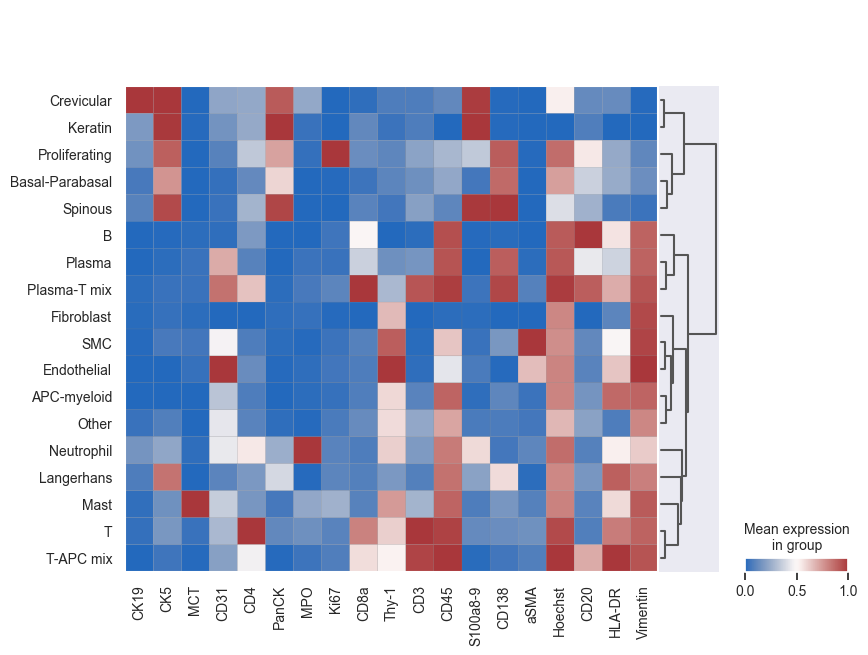

In [14]:
sc.pl.matrixplot(adata, var_names=adata.var.index, groupby='lvl2.5_spatial_cluster', dendrogram=True, use_raw=False, cmap="vlag", standard_scale='var')

In [16]:
unique_values = adata.obs['lvl2.5_spatial_cluster'].unique().tolist()
print(unique_values)

['Keratin', 'Langerhans', 'Fibroblast', 'Spinous', 'Neutrophil', 'Proliferating', 'Basal-Parabasal', 'Other', 'APC-myeloid', 'Crevicular', 'Mast', 'T', 'Plasma', 'T-APC mix', 'Endothelial', 'SMC', 'Plasma-T mix', 'B']


Trying to set attribute `._uns` of view, copying.


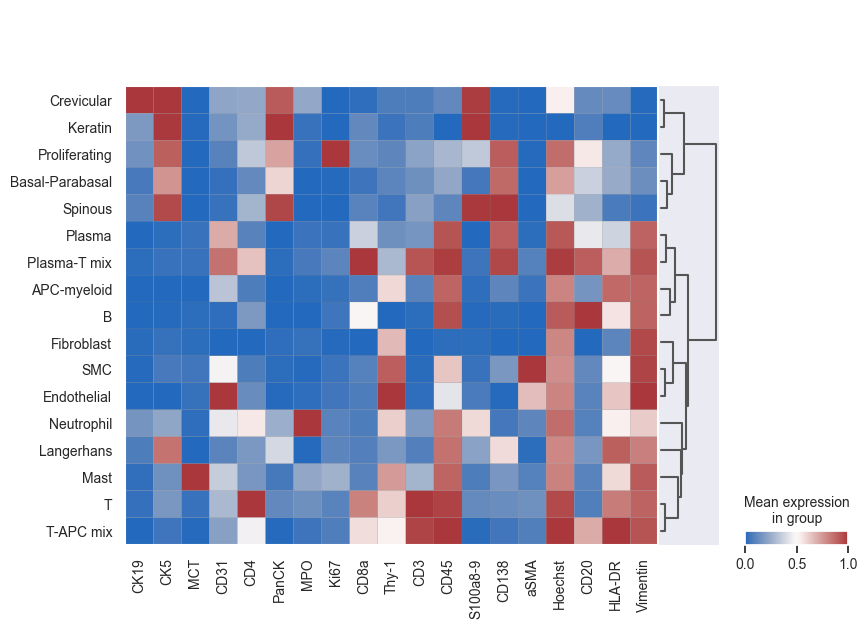

In [23]:
import scanpy as sc

# Define the clusters you want to include
clusters_of_interest = ['Keratin', 'Langerhans', 'Fibroblast', 'Spinous', 'Neutrophil', 'Proliferating', 'Basal-Parabasal', 'APC-myeloid', 'Crevicular', 'Mast', 'T', 'Plasma', 'T-APC mix', 'Endothelial', 'SMC', 'Plasma-T mix', 'B']

# Filter the AnnData object to include only these clusters
adata_subset = adata[adata.obs['lvl2.5_spatial_cluster'].isin(clusters_of_interest)]

# Recompute the dendrogram for the subsetted data
sc.tl.dendrogram(adata_subset, groupby='lvl2.5_spatial_cluster')

# Example with sc.pl.matrixplot for all genes
sc.pl.matrixplot(adata_subset, var_names=adata.var_names, groupby='lvl2.5_spatial_cluster', dendrogram=True, use_raw=False, cmap="vlag", standard_scale='var')


Trying to set attribute `._uns` of view, copying.


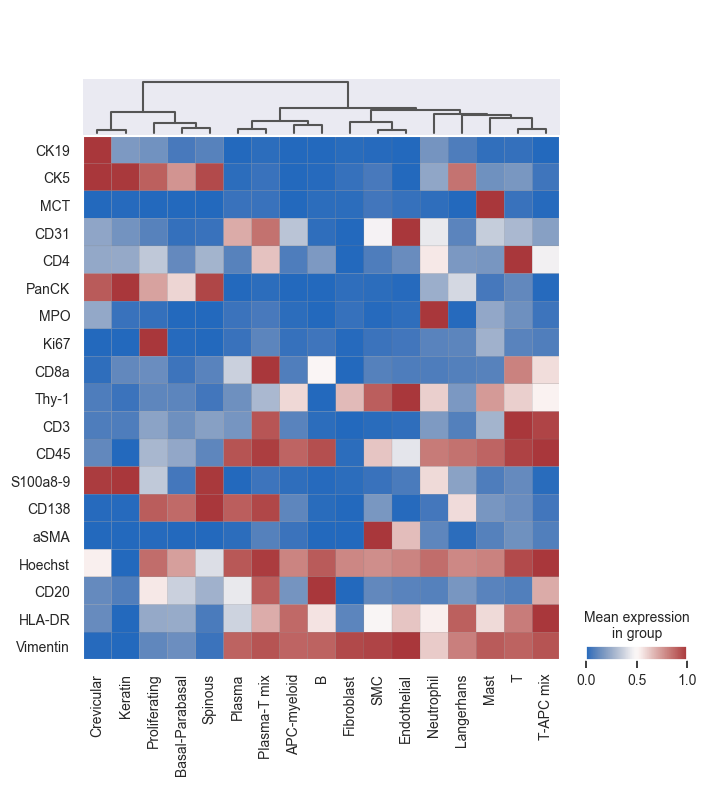

In [5]:
import scanpy as sc

# Define the clusters you want to include
clusters_of_interest = ['Keratin', 'Langerhans', 'Fibroblast', 'Spinous', 'Neutrophil', 'Proliferating', 'Basal-Parabasal', 'APC-myeloid', 'Crevicular', 'Mast', 'T', 'Plasma', 'T-APC mix', 'Endothelial', 'SMC', 'Plasma-T mix', 'B']

# Filter the AnnData object to include only these clusters
adata_subset = adata[adata.obs['lvl2.5_spatial_cluster'].isin(clusters_of_interest)]

# Recompute the dendrogram for the subsetted data
sc.tl.dendrogram(adata_subset, groupby='lvl2.5_spatial_cluster')

# Example with sc.pl.matrixplot for all genes
sc.pl.matrixplot(adata_subset, var_names=adata.var_names, groupby='lvl2.5_spatial_cluster', dendrogram=True, use_raw=False, cmap="vlag", standard_scale='var', swap_axes=True)


Trying to set attribute `._uns` of view, copying.


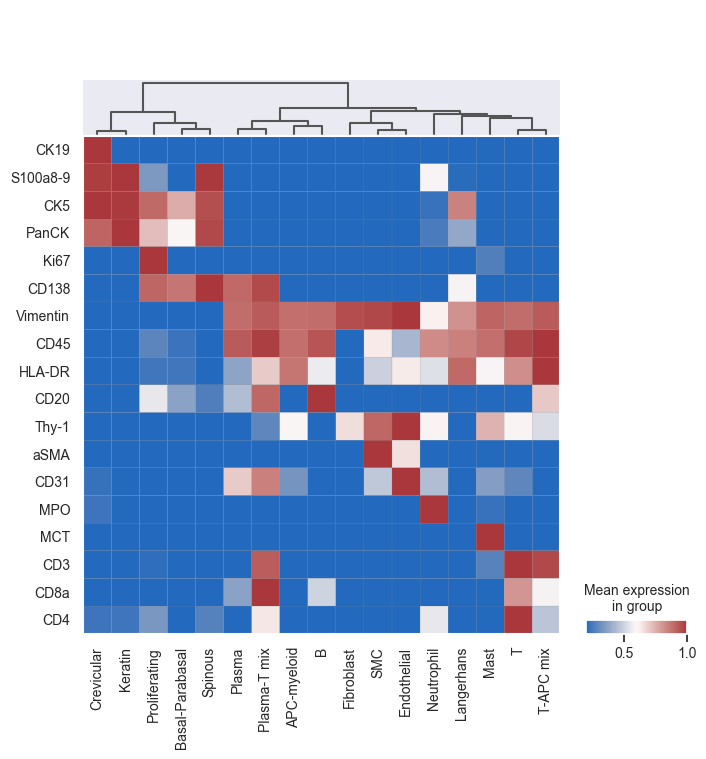

In [14]:
import scanpy as sc

# Define the clusters you want to include
clusters_of_interest = ['Keratin', 'Langerhans', 'Fibroblast', 'Spinous', 'Neutrophil', 'Proliferating', 
                        'Basal-Parabasal', 'APC-myeloid', 'Crevicular', 'Mast', 'T', 'Plasma', 
                        'T-APC mix', 'Endothelial', 'SMC', 'Plasma-T mix', 'B']

# Filter the AnnData object to include only these clusters
adata_subset = adata[adata.obs['lvl2.5_spatial_cluster'].isin(clusters_of_interest)]

# Recompute the dendrogram for the subsetted data
sc.tl.dendrogram(adata_subset, groupby='lvl2.5_spatial_cluster')

# Define the order of genes you want to visualize
ordered_genes = ['CK19', 'S100a8-9', 'CK5', 'PanCK', 'Ki67', 'CD138', 'Vimentin','CD45','HLA-DR', 'CD20', 'Thy-1', 'aSMA', 'CD31', 'MPO', 'MCT','CD3', 'CD8a', 'CD4',]  # replace with the actual gene names and their order

# Example with sc.pl.matrixplot for ordered genes
sc.pl.matrixplot(adata_subset, var_names=ordered_genes, groupby='lvl2.5_spatial_cluster', 
                 dendrogram=True, use_raw=False, cmap="vlag", standard_scale='var', swap_axes=True, vmin=0.2)


In [6]:
unique_values = adata.obs['spatial_cluster'].unique().tolist()
print(unique_values)

['Ep.k', 'Lang', 'Fib.Thy1(-)', 'Ep.sp', 'Neut.IE', 'Fib.Thy1(+)', 'Ep.prol', 'Ep.b-pb', 'ECM.Vim(+)', 'Neut.S100a8-9(-)', 'APCmyel.perivasc', 'Ep.crev', 'APC.myel', 'Mast', 'T.cyt', 'Plasma', 'T.APCmyel.mix', 'En.aSMA(-)', 'En.Im.mix', 'En.HLA-DR(+)', 'Neut.BV', 'Thy1.CD45.cell', 'T.IE', 'Fib.HLA-DR(+)', 'En.HLA-DR(-)', 'SMC.HLA-DR(+)', 'Neut.S100a8-9.CT', 'Tcyt.B.mix', 'SMC.HLA-DR(-)', 'Pl.T.mix', 'Unclear', 'T.h', 'Th.B.mix', 'B']


Trying to set attribute `._uns` of view, copying.


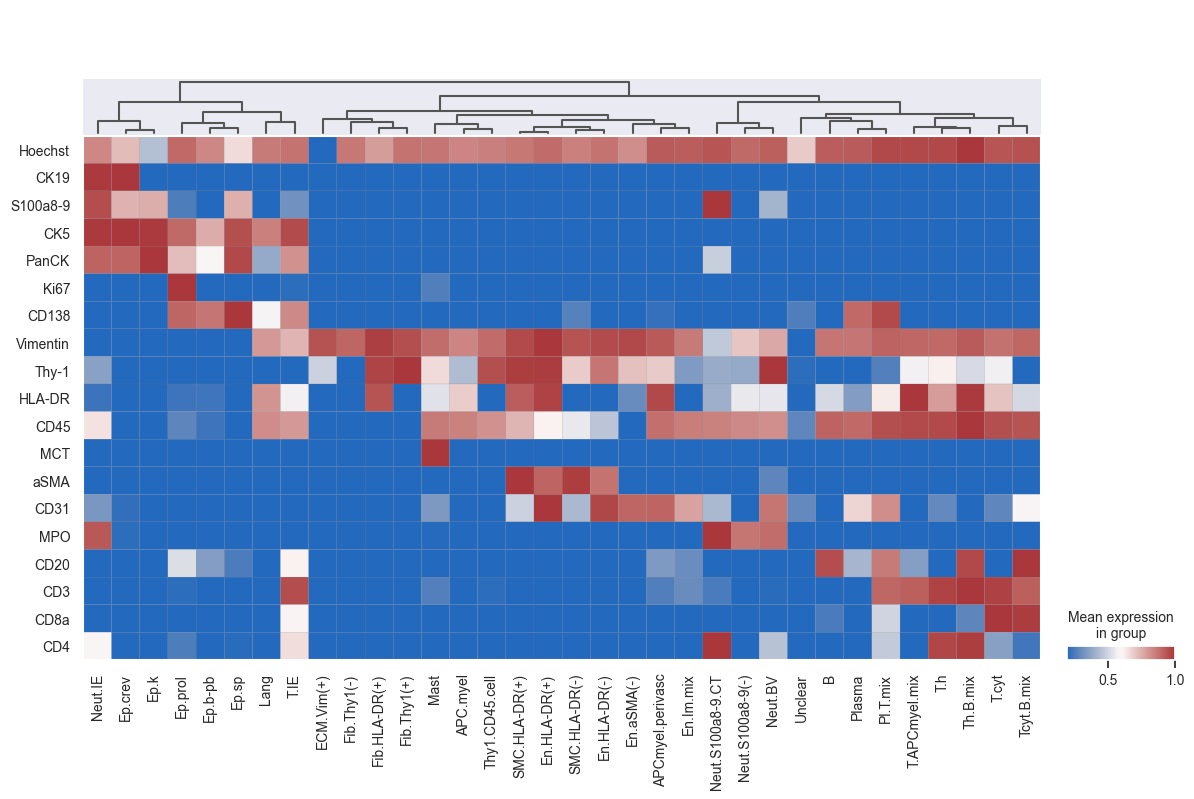

In [15]:
import scanpy as sc

# Define the clusters you want to include
clusters_of_interest = ['Ep.k', 'Lang', 'Fib.Thy1(-)', 'Ep.sp', 'Neut.IE', 'Fib.Thy1(+)', 'Ep.prol', 'Ep.b-pb', 'ECM.Vim(+)', 'Neut.S100a8-9(-)', 'APCmyel.perivasc', 'Ep.crev', 'APC.myel', 'Mast', 'T.cyt', 'Plasma', 'T.APCmyel.mix', 'En.aSMA(-)', 'En.Im.mix', 'En.HLA-DR(+)', 'Neut.BV', 'Thy1.CD45.cell', 'T.IE', 'Fib.HLA-DR(+)', 'En.HLA-DR(-)', 'SMC.HLA-DR(+)', 'Neut.S100a8-9.CT', 'Tcyt.B.mix', 'SMC.HLA-DR(-)', 'Pl.T.mix', 'Unclear', 'T.h', 'Th.B.mix', 'B']

# Filter the AnnData object to include only these clusters
adata_subset = adata[adata.obs['spatial_cluster'].isin(clusters_of_interest)]

# Recompute the dendrogram for the subsetted data
sc.tl.dendrogram(adata_subset, groupby='spatial_cluster')

# Define the order of genes you want to visualize
ordered_genes = ['Hoechst', 'CK19', 'S100a8-9', 'CK5', 'PanCK', 'Ki67', 'CD138', 'Vimentin', 'Thy-1', 'HLA-DR', 'CD45', 'MCT', 'aSMA', 'CD31', 'MPO', 'CD20', 'CD3', 'CD8a', 'CD4',]  # replace with the actual gene names and their order

# Example with sc.pl.matrixplot for ordered genes
sc.pl.matrixplot(adata_subset, var_names=ordered_genes, groupby='spatial_cluster', 
                 dendrogram=True, use_raw=False, cmap="vlag", standard_scale='var', swap_axes=True, vmin=0.2)


Trying to set attribute `._uns` of view, copying.


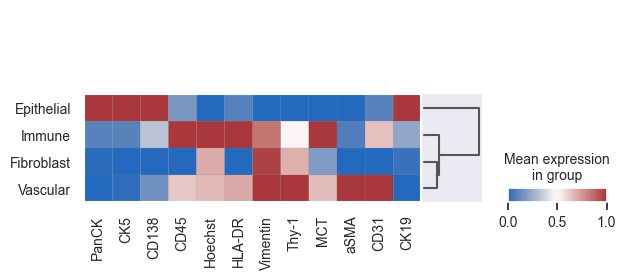

In [29]:
#top 3 defining protein markers
import scanpy as sc

# Step 1: Subset the adata object to only the specific clusters
desired_clusters = ['Epithelial', 'Fibroblast', 'Immune', 'Vascular']
adata_subset = adata[adata.obs['lvl1_spatial_cluster'].isin(desired_clusters)]

# Step 2: Perform differential expression analysis for the selected clusters
sc.tl.rank_genes_groups(adata_subset, 'lvl1_spatial_cluster', method='wilcoxon', use_raw=False)

# Step 3: Extract top marker genes for the selected clusters
top_genes_per_cluster = {}
for cluster in adata_subset.obs['lvl1_spatial_cluster'].cat.categories:
    top_genes_per_cluster[cluster] = adata_subset.uns['rank_genes_groups']['names'][cluster]

# Step 4: Generate the dendrogram to get cluster order
sc.tl.dendrogram(adata_subset, groupby='lvl1_spatial_cluster')

# Step 5: Retrieve the cluster order based on the dendrogram
cluster_order = adata_subset.uns['dendrogram_lvl1_spatial_cluster']['categories_ordered']

# Step 6: Ensure each cluster has at least 3 unique genes
unique_genes = set()
genes_for_plot = []

for cluster in cluster_order:
    if cluster in top_genes_per_cluster:
        cluster_genes = top_genes_per_cluster[cluster]
        genes_for_this_cluster = []
        for gene in cluster_genes:
            if len(genes_for_this_cluster) >= 3:
                break
            if gene not in unique_genes:
                unique_genes.add(gene)
                genes_for_this_cluster.append(gene)
        genes_for_plot.extend(genes_for_this_cluster)

# Step 7: Plot the matrixplot with the unique genes
sc.pl.matrixplot(adata_subset, var_names=genes_for_plot, groupby='lvl1_spatial_cluster', dendrogram=True, use_raw=False, cmap="vlag", standard_scale='var')

Trying to set attribute `._uns` of view, copying.


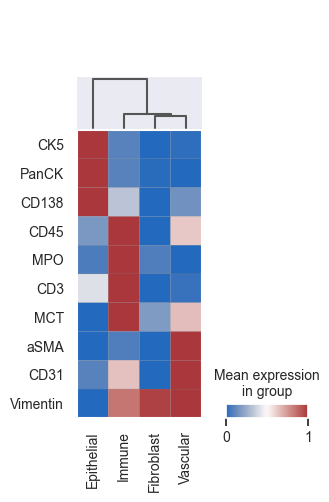

In [4]:
#manual selection of protein markers
import scanpy as sc

# Ensure the dendrogram information is calculated for the grouping
sc.tl.dendrogram(adata, groupby='lvl1_spatial_cluster')

# Define the subset of clusters you want to include
clusters_of_interest =  ['Epithelial', 'Fibroblast', 'Immune', 'Vascular'] # Replace with actual cluster names

# Define the subset of genes you want to plot
correct_order = ['CK5', 'PanCK', 'CD138', 'CD45', 'MPO', 'CD3', 'MCT', 'aSMA', 'CD31', 'Vimentin']

# Subset the AnnData object to include only the clusters of interest
adata_subset = adata[adata.obs['lvl1_spatial_cluster'].isin(clusters_of_interest)]

# Recompute the dendrogram for the subsetted data
sc.tl.dendrogram(adata_subset, groupby='lvl1_spatial_cluster')

# Create the MatrixPlot with the desired genes and clusters
dotplot = sc.pl.matrixplot(
    adata_subset, 
    var_names=correct_order, 
    groupby='lvl1_spatial_cluster', 
    dendrogram=True, 
    use_raw=False, 
    cmap="vlag",  # Use a color map of your choice
    standard_scale='var', 
    swap_axes=True
)


In [9]:
import scanpy as sc

# Define the replacement dictionary
replacement_dict2 = {
    'CT-Lymphoid interface': 'Immune-CT interface-1',
    'Immune-BV': 'Immune-CT interface-2'
}

# Replace values in the 'niche' column
adata.obs['niche_knn30k11'] = adata.obs['niche_knn30k11'].replace(replacement_dict2)

# Print unique values after replacement
print(adata.obs['niche_knn30k11'].unique())

['Spinous', 'Crevicular', 'Parabasal', 'Basal-Parabasal', 'Immune-CT interface-1', ..., 'Neutrophil (CT)', 'BV', 'Immune-CT interface-2', 'Plasma', 'Lymphoid']
Length: 11
Categories (11, object): ['Fibrous CT', 'Spinous', 'Plasma', 'Immune-CT interface-1', ..., 'Neutrophil (CT)', 'Immune-CT interface-2', 'Lymphoid', 'BV']


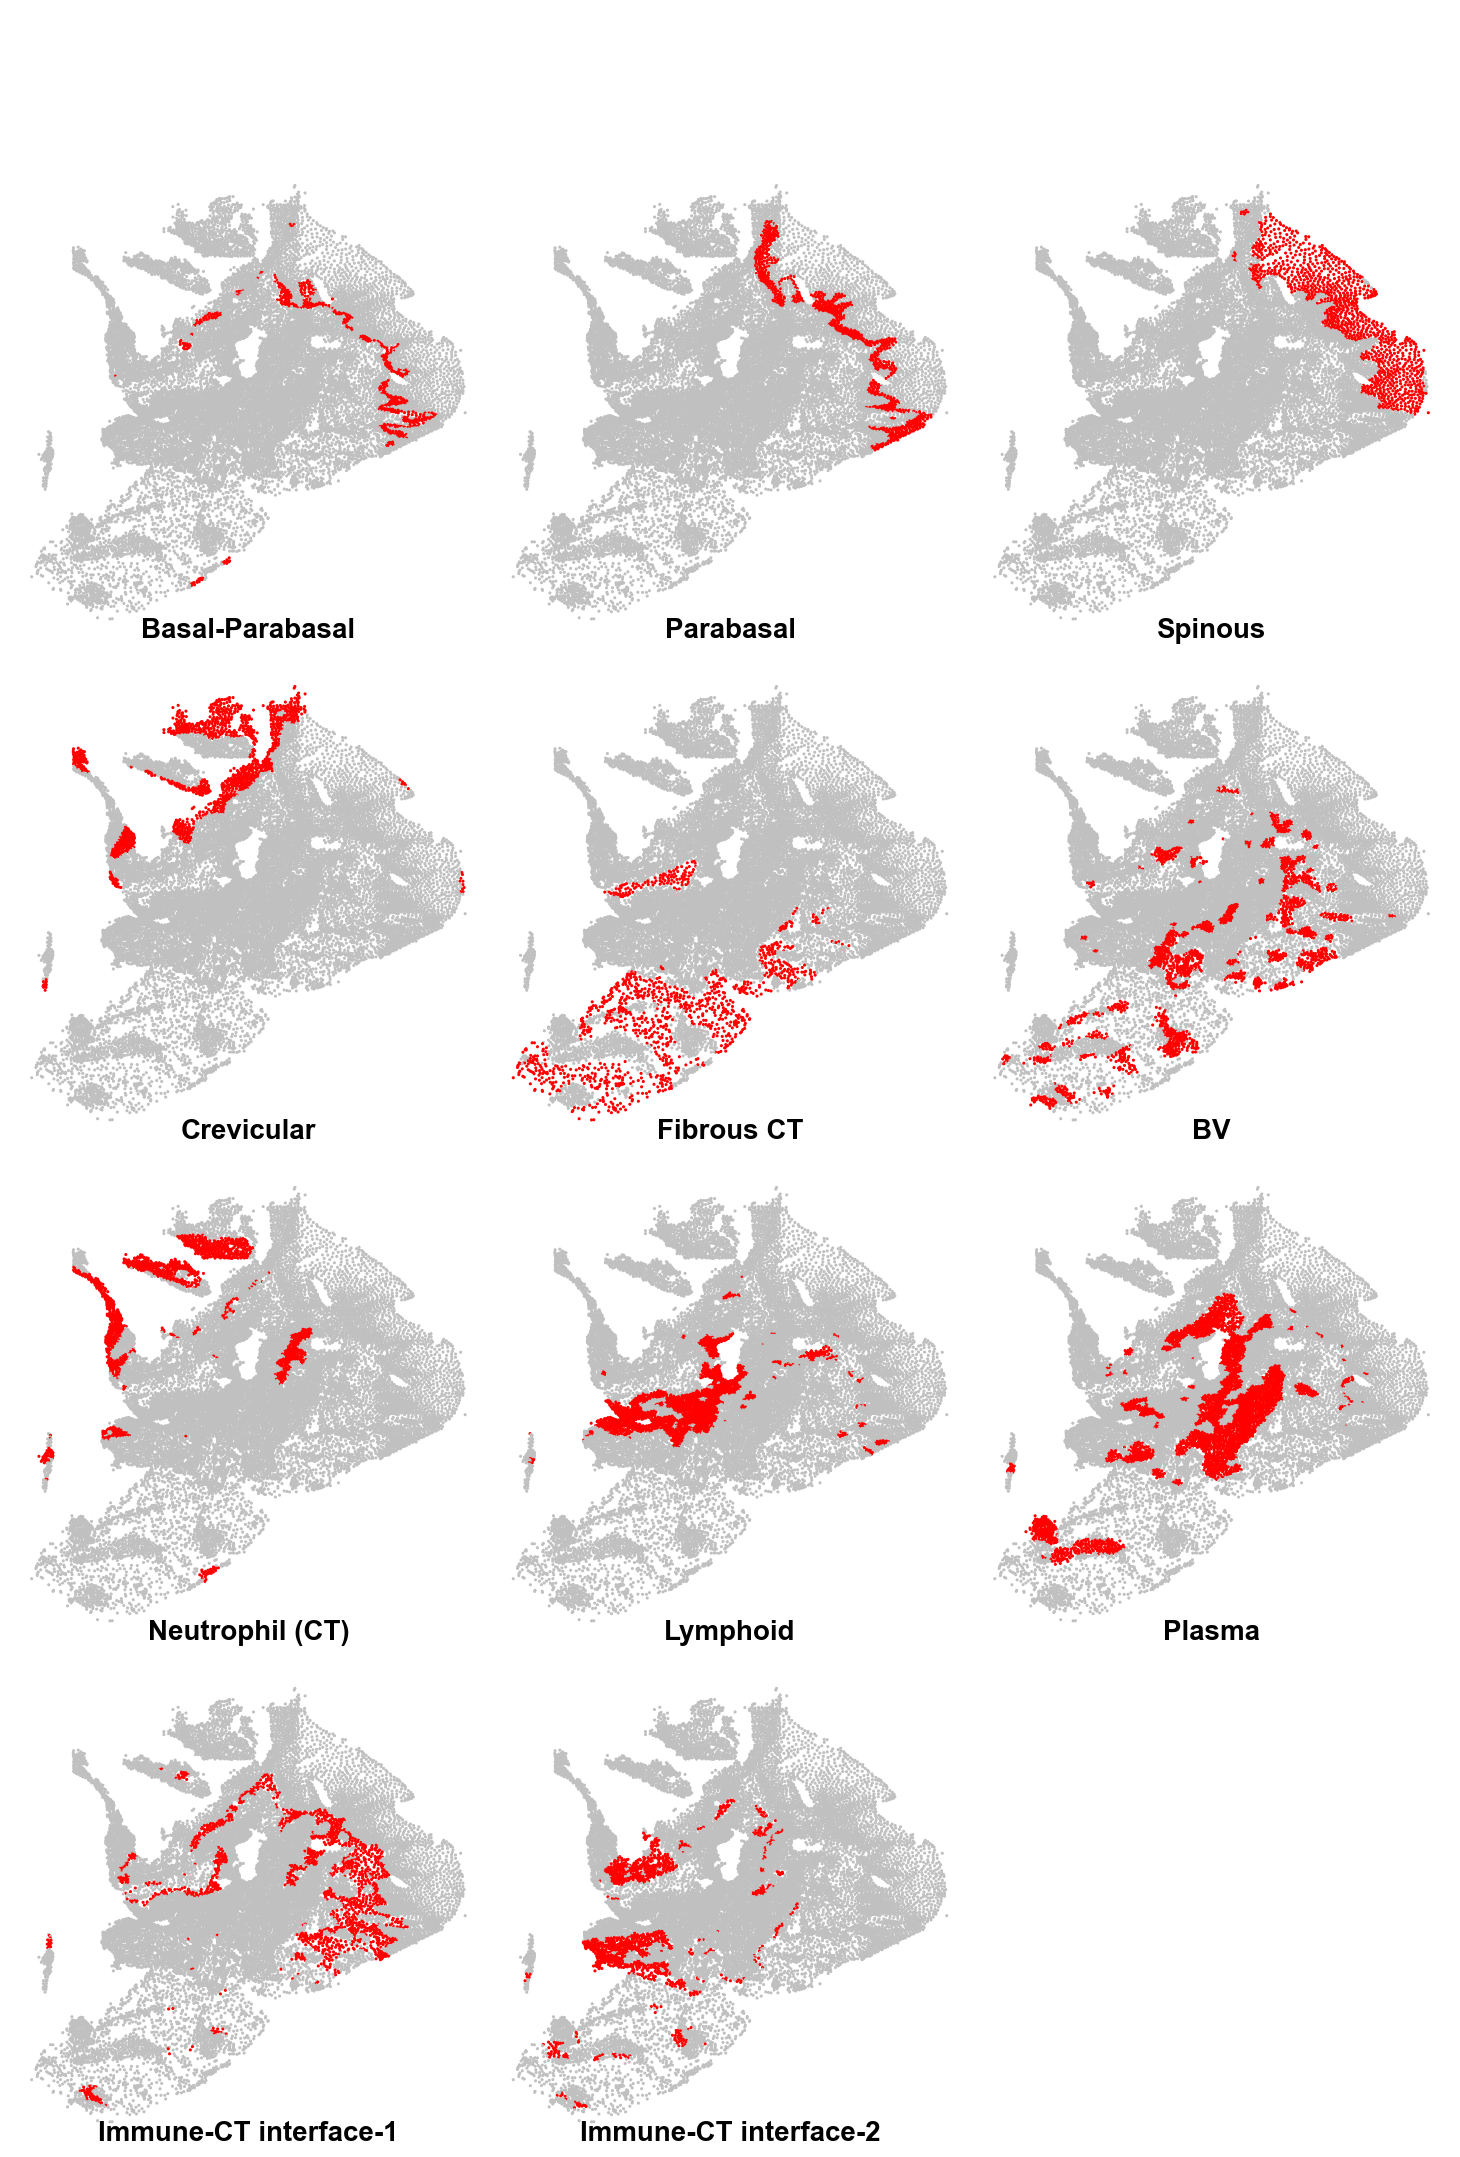

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import os

# Sample and rotation setup for HV219B1_HV219B1_0
sample_name = 'HV219B1_HV219B1_0'
rotation_angle = 180  # Define rotation for this sample

# Specify the directory where you want to save the PDF
save_directory = '/data/vasileiosionat2/IBEX_FINAL/Scimap/Outputs/Clusters_new/pdfs'
pdf_filename = os.path.join(save_directory, f'{sample_name}_all_clusters_4rows.pdf')

# Subset the data for the specific sample
subset_adata = adata[adata.obs['imageid'] == sample_name]

# Get unique clusters for the selected sample
unique_clusters = subset_adata.obs['niche_knn30k11'].unique()

# Define the order of clusters as you want them to appear
custom_order = ['Basal-Parabasal', 'Parabasal', 'Spinous', 'Crevicular', 'Fibrous CT', 'BV', 'Neutrophil (CT)', 'Lymphoid', 'Plasma','Immune-CT interface-1','Immune-CT interface-2']  # Replace with your actual cluster names

# Reorder clusters based on custom_order
ordered_clusters = [cluster for cluster in custom_order if cluster in unique_clusters]

# Define the number of rows and columns
num_rows = 4
num_cols = int(np.ceil(len(ordered_clusters) / num_rows))  # Calculate columns based on clusters and rows

# Create a PdfPages object to save the plots
with PdfPages(pdf_filename) as pdf:
    # Create a figure for the sample
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 22))
    fig.patch.set_facecolor('white')

    # Flatten the axes array for easier indexing
    axes = axes.flatten()

    # Get the coordinates for the sample
    x_coords = subset_adata.obs['X_centroid']
    y_coords = subset_adata.obs['Y_centroid']
    
    # Apply rotation
    angle = np.deg2rad(rotation_angle)
    new_x_coords = x_coords * np.cos(angle) - y_coords * np.sin(angle)
    new_y_coords = x_coords * np.sin(angle) + y_coords * np.cos(angle)

    # Determine aspect ratio
    x_range = new_x_coords.max() - new_x_coords.min()
    y_range = new_y_coords.max() - new_y_coords.min()
    aspect_ratio = x_range / y_range

    # Loop over each unique cluster in the ordered list
    for idx, cluster in enumerate(ordered_clusters):
        ax = axes[idx]

        # Set black background for the subplot
        ax.set_facecolor('white')

        # Remove the outline
        for spine in ax.spines.values():
            spine.set_visible(False)

        # Map colors such that the current cluster is white and others are grey
        color_mapping = subset_adata.obs['niche_knn30k11'].apply(
            lambda x: 'red' if x == cluster else '#C0C0C0'
        )

        # Scatter plot for the current cluster
        scatter = ax.scatter(
            x=new_x_coords, 
            y=new_y_coords, 
            c=color_mapping, 
            s=1.5  # Adjust dot size
        )

        # Set aspect ratio for each subplot
        ax.set_aspect(aspect_ratio)

        # Add the cluster name below the plot
        ax.text(
            0.5, 0.02, f'{cluster}', 
            horizontalalignment='center', 
            verticalalignment='center', 
            transform=ax.transAxes, 
            color='black', fontsize=20, weight='bold'
        )

        # Remove grids
        ax.grid(False)

        # Remove ticks and their labels
        ax.set_xticks([])
        ax.set_yticks([])

    # Turn off empty subplots if there are any
    for ax in axes[len(ordered_clusters):]:
        ax.set_visible(False)

    # Adjust the spacing between subplots
    plt.subplots_adjust(
        left=0.05,    # Space from left edge
        right=0.95,   # Space from right edge
        top=0.95,     # Space from top edge
        bottom=0.05,  # Space from bottom edge
        wspace=0.01,   # Width space between columns
        hspace=0.05    # Height space between rows
    )

    # Add a title to the overall figure
    plt.suptitle(f'All Clusters in {sample_name}', color='white', fontsize=20, weight='bold', y=1.02)

    # Save the current figure to the PDF
    #pdf.savefig(fig, dpi=100)
    plt.show()
    plt.close(fig)

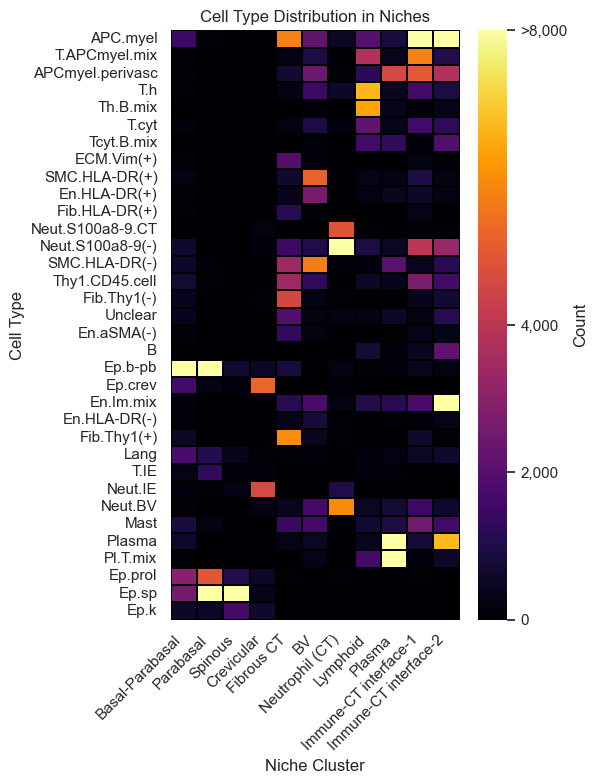

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'adata.obs' is available and contains 'niche_knn30k11' and 'spatial_cluster'
df = pd.DataFrame(adata.obs)
df['niche_knn30k11'] = df['niche_knn30k11'].astype('category')

# Aggregate counts
niche_groups = df.groupby(['niche_knn30k11', 'spatial_cluster']).size().unstack(fill_value=0)

# Transpose the DataFrame to swap axes
niche_groups = niche_groups.T

# Define custom order for the x-axis (after transposing, so this is the niche clusters now)
custom_order = ['Basal-Parabasal', 'Parabasal', 'Spinous', 'Crevicular', 'Fibrous CT', 'BV', 'Neutrophil (CT)', 'Lymphoid', 'Plasma','Immune-CT interface-1','Immune-CT interface-2']

# Reindex columns based on the custom order
niche_groups = niche_groups.reindex(columns=custom_order)

# Plot heatmap with enhanced colormap and custom vmax
plt.figure(figsize=(6, 8))  # Adjusted figsize to accommodate the x-axis labels
sns.heatmap(niche_groups, cmap='inferno', cbar_kws={'label': 'Count', 'ticks': [0, 2000, 4000, 8000], 'format': '%.0f'}, linewidths=0.05, linecolor='black', vmax=8000)
plt.title('Cell Type Distribution in Niches')
plt.xlabel('Niche Cluster')
plt.ylabel('Cell Type')
plt.xticks(rotation=45, ha='right')  # Adjust rotation and alignment of xticks
plt.yticks(rotation=0)

# Customize the color bar label
cbar = plt.gca().collections[0].colorbar
cbar.set_ticks([0, 2000, 4000, 8000])
cbar.ax.set_yticklabels(['0', '2,000', '4,000', '>8,000'])  # Set custom tick labels

plt.tight_layout()  # Ensures all elements fit within the figure area
plt.show()

Trying to set attribute `._uns` of view, copying.


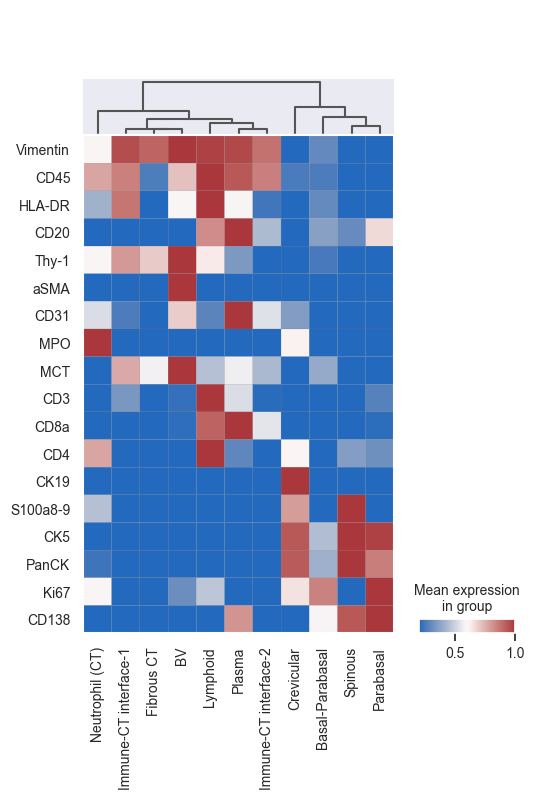

In [35]:
import scanpy as sc
# Define the clusters you want to include
clusters_of_interest = ['Basal-Parabasal', 'Parabasal', 'Spinous', 'Crevicular', 
                        'Fibrous CT', 'BV', 'Neutrophil (CT)', 'Lymphoid', 'Plasma',
                        'Immune-CT interface-1','Immune-CT interface-2']

# Filter the AnnData object to include only these clusters
adata_subset = adata[adata.obs['niche_knn30k11'].isin(clusters_of_interest)]

# Recompute the dendrogram for the subsetted data
sc.tl.dendrogram(adata_subset, groupby='niche_knn30k11')

# Define the order of genes you want to visualize
ordered_genes = ['Vimentin','CD45','HLA-DR', 'CD20', 'Thy-1', 'aSMA', 'CD31', 'MPO', 'MCT','CD3', 'CD8a', 'CD4','CK19', 'S100a8-9', 'CK5', 'PanCK', 'Ki67', 'CD138']  # replace with the actual gene names and their order

# Example with sc.pl.matrixplot for ordered genes
sc.pl.matrixplot(adata_subset, var_names=ordered_genes, groupby='niche_knn30k11', 
                 dendrogram=True, use_raw=False, cmap="vlag", standard_scale='var', swap_axes=True, vmin=0.2)

In [8]:
adata.write_h5ad("/data/vasileiosionat2/IBEX_FINAL/Scimap/Adata/adata_ROIs.h5ad")